# Часть 1. Работа с данными

In [1]:
import pandas as pd

# Необходимо указать полный путь до csv-файла
df = pd.read_csv ("/content/Тестовое задание - tz_data.csv")
df

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,1.0,279,10.971214,4.857810387061303
225,greetings,2.0,Кластер 2,sapphire grounds,1.0,335,1.160626,3.642819729434763
226,greetings,3.0,Кластер 3,entire ethical speakers,1.0,1782,7.985910,6.003699268483375
227,greetings,3.0,Кластер 3,courtesy textiles diameter,1.0,84,0.509490,4.151198803764073


## Подготовка датасета

In [2]:
import numpy as np
df['area'].replace('', np.nan, inplace=True)
df.dropna(subset=['area'], inplace=True)

In [3]:
def conv_Ycoordinate(x):
  try:
    return float(x)
  except ValueError:
    return 0

def conv_countValue(x):
  try:
    return int(x)
  except ValueError:
    return 0

In [4]:
df.drop(['good (1)'], axis=1, inplace=True)
df.y = df.y.apply(conv_Ycoordinate)
df['count'] = df['count'].apply(conv_countValue)
# df['count'] = df['count'].apply(lambda x: int(x))

df.cluster = df.cluster.apply(lambda x: int(x))
df.cluster_name = df.cluster_name.apply(lambda x: str(x))

In [5]:
import random
# col = ['1', '2', '3', '4']
col = ['blue','orange','green','red',]

## Работа с датасетом

In [6]:
# Removing duplicates & adding "color" column
res = pd.DataFrame(columns=['area', 'cluster', 'cluster_name', 'keyword', 'count', 'x', 'y', 'color'])
count = 0

for area in df.area.unique():
  # print(area)

  cur = df.loc[df['area'] == area].drop_duplicates(subset=['keyword'], keep='last').reset_index(drop=True)
  # cur.drop(['index'], axis=1, inplace=True)
  cur['color'] = cur.cluster.apply(lambda x: col[int(x)])
  # print(cur.size)
  count+=len(cur)
  prev = cur

  # Вы можете раскомментировать следующую строку, чтобы цвета изменялись случайным образом
  # random.shuffle(col)

  res = pd.merge(res, cur, how='outer')
  # print(count)
res

,area,cluster,cluster_name,keyword,count,x,y,color
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796,blue
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.850729,blue
2,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281428,blue
3,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.396741,orange
4,eligibility,1,Кластер 1,knives everybody,1377,5.607192,13.155189,orange
...,...,...,...,...,...,...,...,...
216,greetings,2,Кластер 2,disposition layout,279,10.971214,4.857810,green
217,greetings,2,Кластер 2,sapphire grounds,335,1.160626,3.642820,green
218,greetings,3,Кластер 3,entire ethical speakers,1782,7.985910,6.003699,red
219,greetings,3,Кластер 3,courtesy textiles diameter,84,0.509490,4.151199,red


In [7]:
# Sorting
res.sort_values(['area','cluster','cluster_name','count'], ascending=[True, True, True, False], inplace=True)
res.reset_index(inplace=True, drop=True)
res

,area,cluster,cluster_name,keyword,count,x,y,color
0,ar\vr,0,Кластер 0,written conflict fabulous,1443,2.991167,7.106799,blue
1,ar\vr,0,Кластер 0,reservations linking,751,10.195602,12.259496,blue
2,ar\vr,0,Кластер 0,interfaces neutral,586,10.443533,13.809915,blue
3,ar\vr,0,Кластер 0,committees parallel,173,6.735260,3.613983,blue
4,ar\vr,1,Кластер 1,postcards looked republic detector,1397,10.474474,6.220012,orange
...,...,...,...,...,...,...,...,...
216,worlds,2,Кластер 2,ringtone parental,471,11.723895,4.363994,green
217,worlds,2,Кластер 2,recipient traffic,236,5.593629,0.553368,green
218,worlds,3,Кластер 3,immunology plates,1653,2.407028,7.651527,red
219,worlds,3,Кластер 3,holdings herbal,1476,3.986508,10.906340,red


In [41]:
res.to_csv('out.csv')

# Часть 2. Построение графиков

Внимание, для корректной работы дальнейшего кода необходим модуль python-intervals! Вы можете его установить, введя в консоль: 

```
pip install python-intervals
```



In [8]:
!pip install python-intervals
import intervals as I


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from pandas.core.groupby.groupby import FrameOrSeries
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 



SYMBOLS_FOR_CARRY = 15
ONE_LINE_SIZE = 0.4
INTERVAL_STEP = 0.1*3.2 # 0.35
BIAS = 0.1
TEXT_SIZE = 10*3.2
POINT_SIZE = 70*3.2*4

In [10]:
def plot_graph(name, t_x=1, t_y=-0.045, k1=-0.5, k2=-0.3, k3=-2.5, k4=1, k5=1, n=0, sym=0):
  a4_dims = (11.7*3.2, 8.27*3.2)
  fig, ax = plt.subplots(figsize=a4_dims)
  plt.title('Диаграмма рассеяния для ' +  str(name), x= t_x , y= t_y, size=TEXT_SIZE) 
            # fontfamily = 'fantasy',
            # fontstyle  = 'oblique',
            # fontsize   = 10)


  # ax.spines["right"].set_visible(False)
  # ax.spines["top"].set_visible(False)
  # ax.spines["bottom"].set_visible(False)
  # ax.spines["left"].set_visible(False)

  ax.axis("off")

  # Scatterplot display
  sns.scatterplot(data = cur_df, x = "x", y = "y", hue="color", style="cluster_name", s = POINT_SIZE)
  params = {'legend.fontsize': 32,
          'legend.handlelength': 3}

  plt.rcParams.update(params)
  ax.legend(loc="upper left", markerscale=5, bbox_to_anchor=(1.25,0.31))


  # Text overlay processing
  bizy = I.empty()

  for line in range(0,cur_df.shape[0]-n):
    
    # Conditions for the current line
    text = cur_df.keyword[line]
    y_position = cur_df.y[line]
    carry_flag = False

    if len(text) > SYMBOLS_FOR_CARRY:
      if text[SYMBOLS_FOR_CARRY-1+sym:].find(' ')>0:
        pos = text[SYMBOLS_FOR_CARRY-1+sym:].find(' ')
        # print(pos)
        # print(text[:14+pos]+'\n'+text[15+pos:])
        text = text[:SYMBOLS_FOR_CARRY-1+sym+pos]+'\n'+text[SYMBOLS_FOR_CARRY+pos+sym:]
        y_position = y_position-ONE_LINE_SIZE
        carry_flag = True
        
    # print(line)
    # print(len(cur_df.keyword[line]))
    if cur_df.y[line] in bizy:
      plt.text(cur_df.x[line]+BIAS, y_position+k1*ONE_LINE_SIZE, text, horizontalalignment='left', size=TEXT_SIZE, color='black', weight='semibold')
      pass
    else:
      plt.text(cur_df.x[line]+BIAS, y_position+k2, text, horizontalalignment='left', size=TEXT_SIZE, color='black', weight='semibold')

    if carry_flag:
      bizy = bizy | I.open(cur_df.y[line]+k3*INTERVAL_STEP, cur_df.y[line]+k5*INTERVAL_STEP)
    else:
      bizy = bizy | I.open(cur_df.y[line]-k4*INTERVAL_STEP, cur_df.y[line]+k4*INTERVAL_STEP)


  if n == 0:
    plt.show() 

## ar\vr

In [11]:
cur_df = res.loc[res['area'] == 'ar\\vr']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

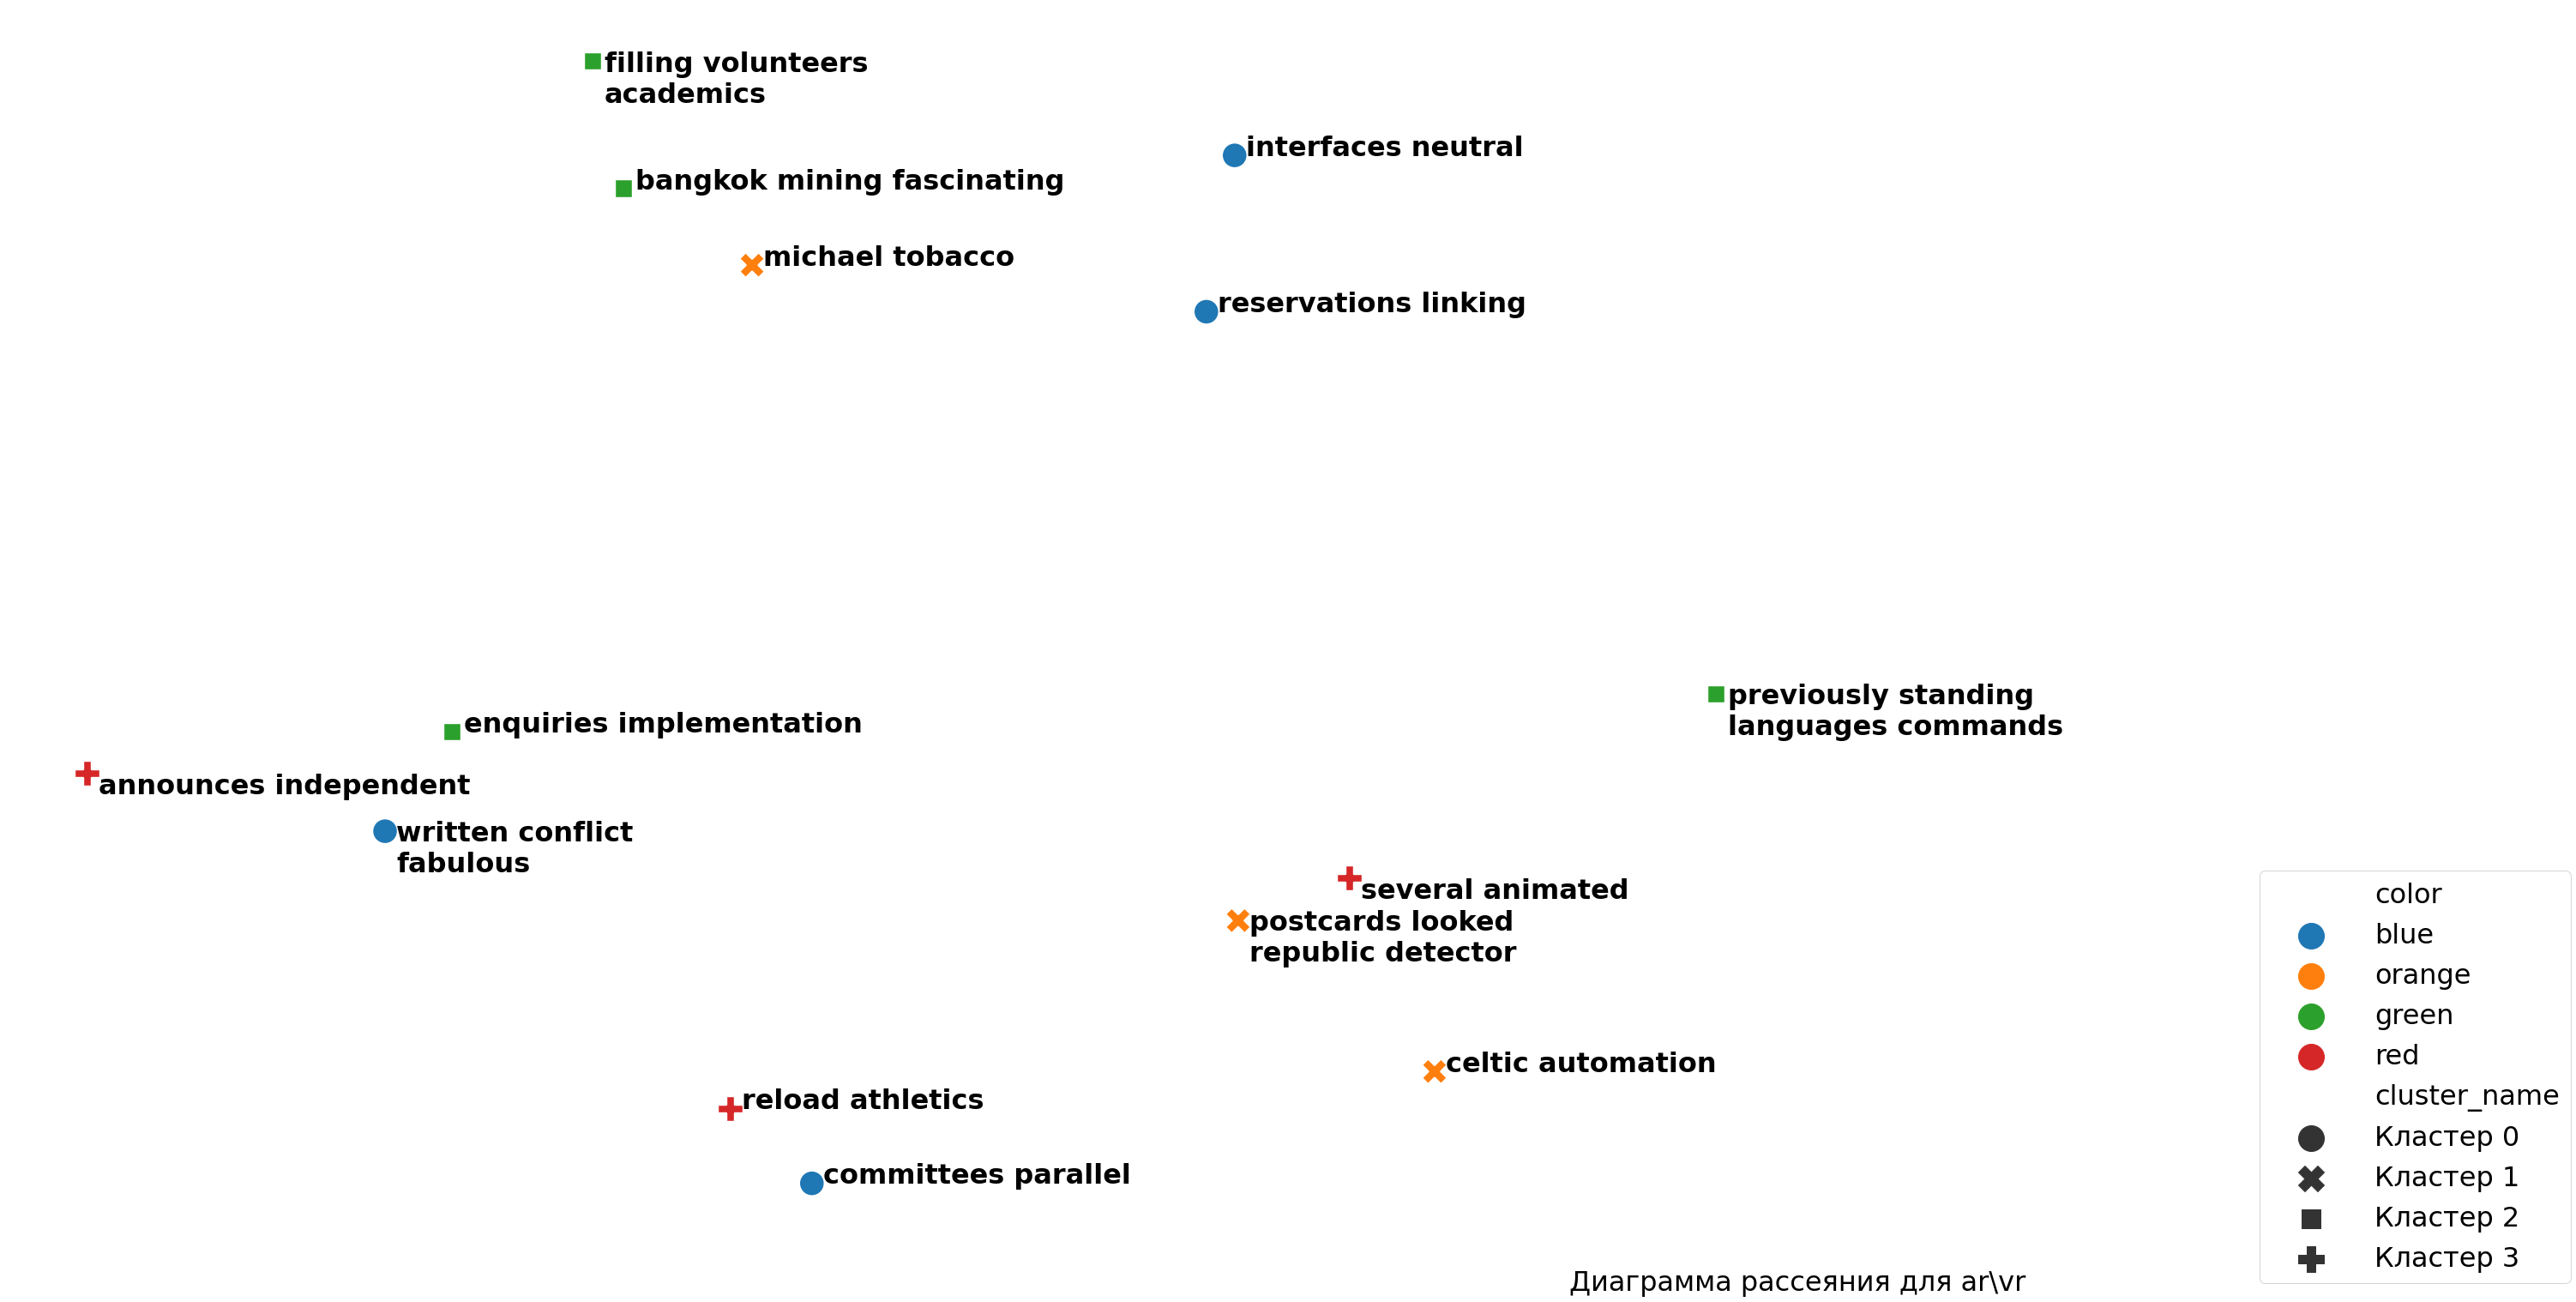

In [12]:
plot_graph('ar\\vr', t_x=1, t_y=-0.045, k1=-0.5, k2=+0, k3=-2.5)

## available

In [13]:
cur_df = res.loc[res['area'] == 'available']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

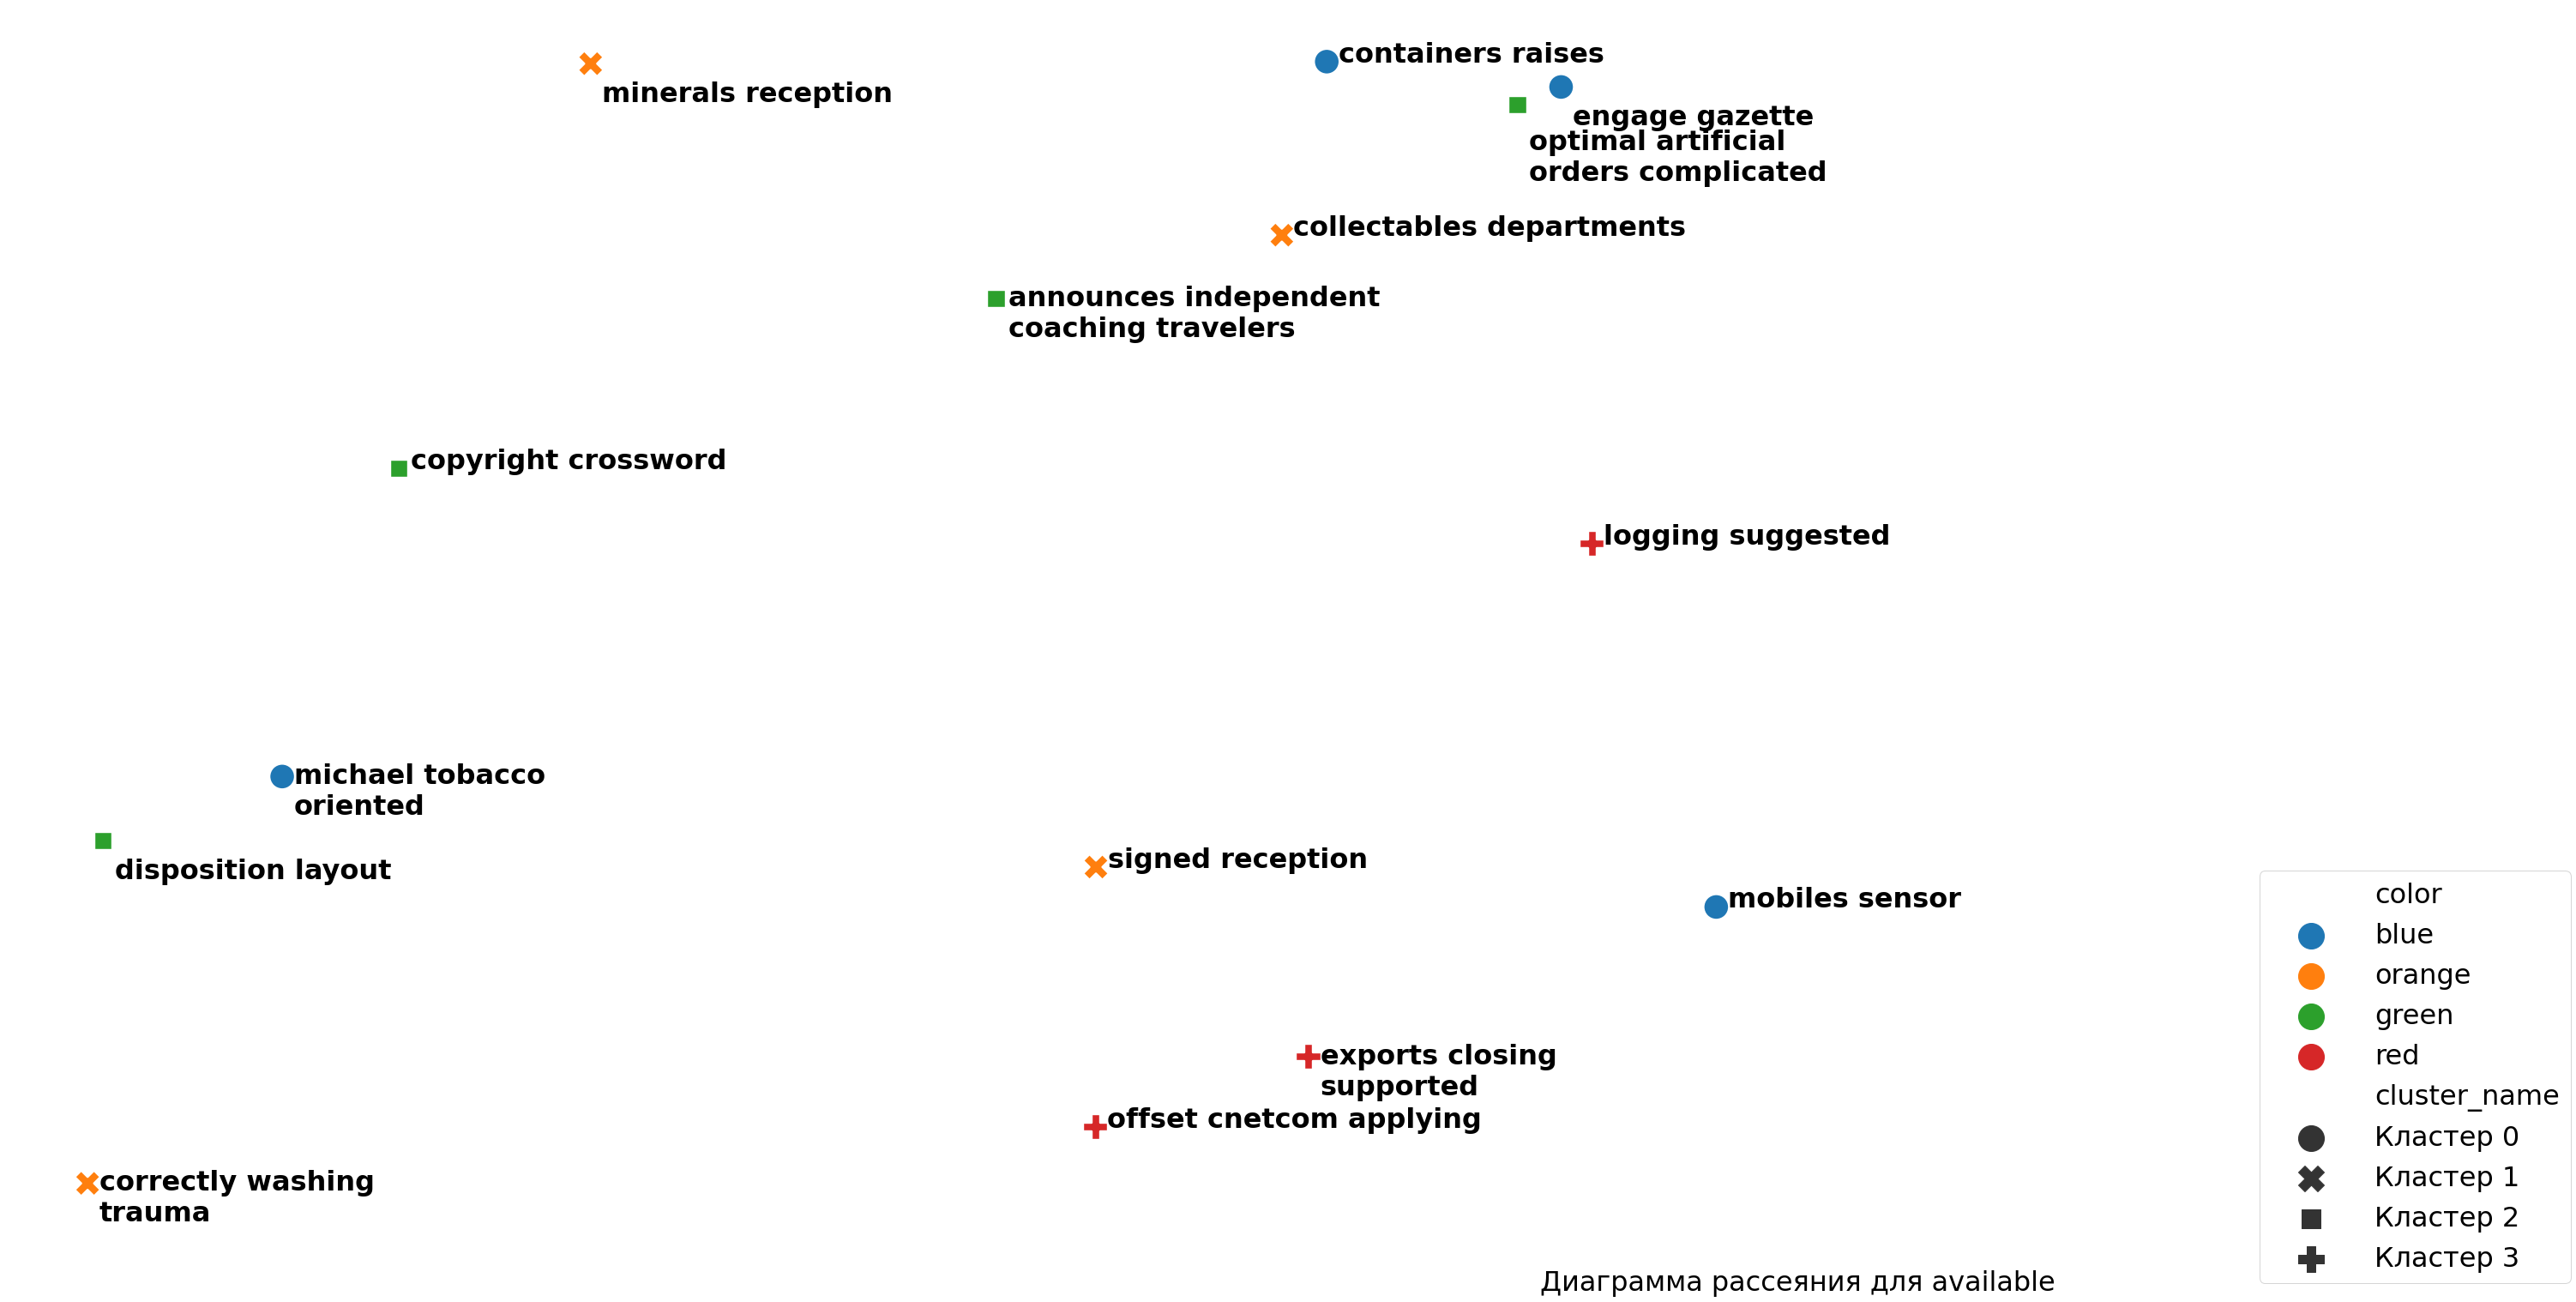

In [14]:
plot_graph('available', t_x=1, t_y=-0.045, k1=-1, k2=+0, k3=-2.5)

## capability

In [15]:
cur_df = res.loc[res['area'] == 'capability']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

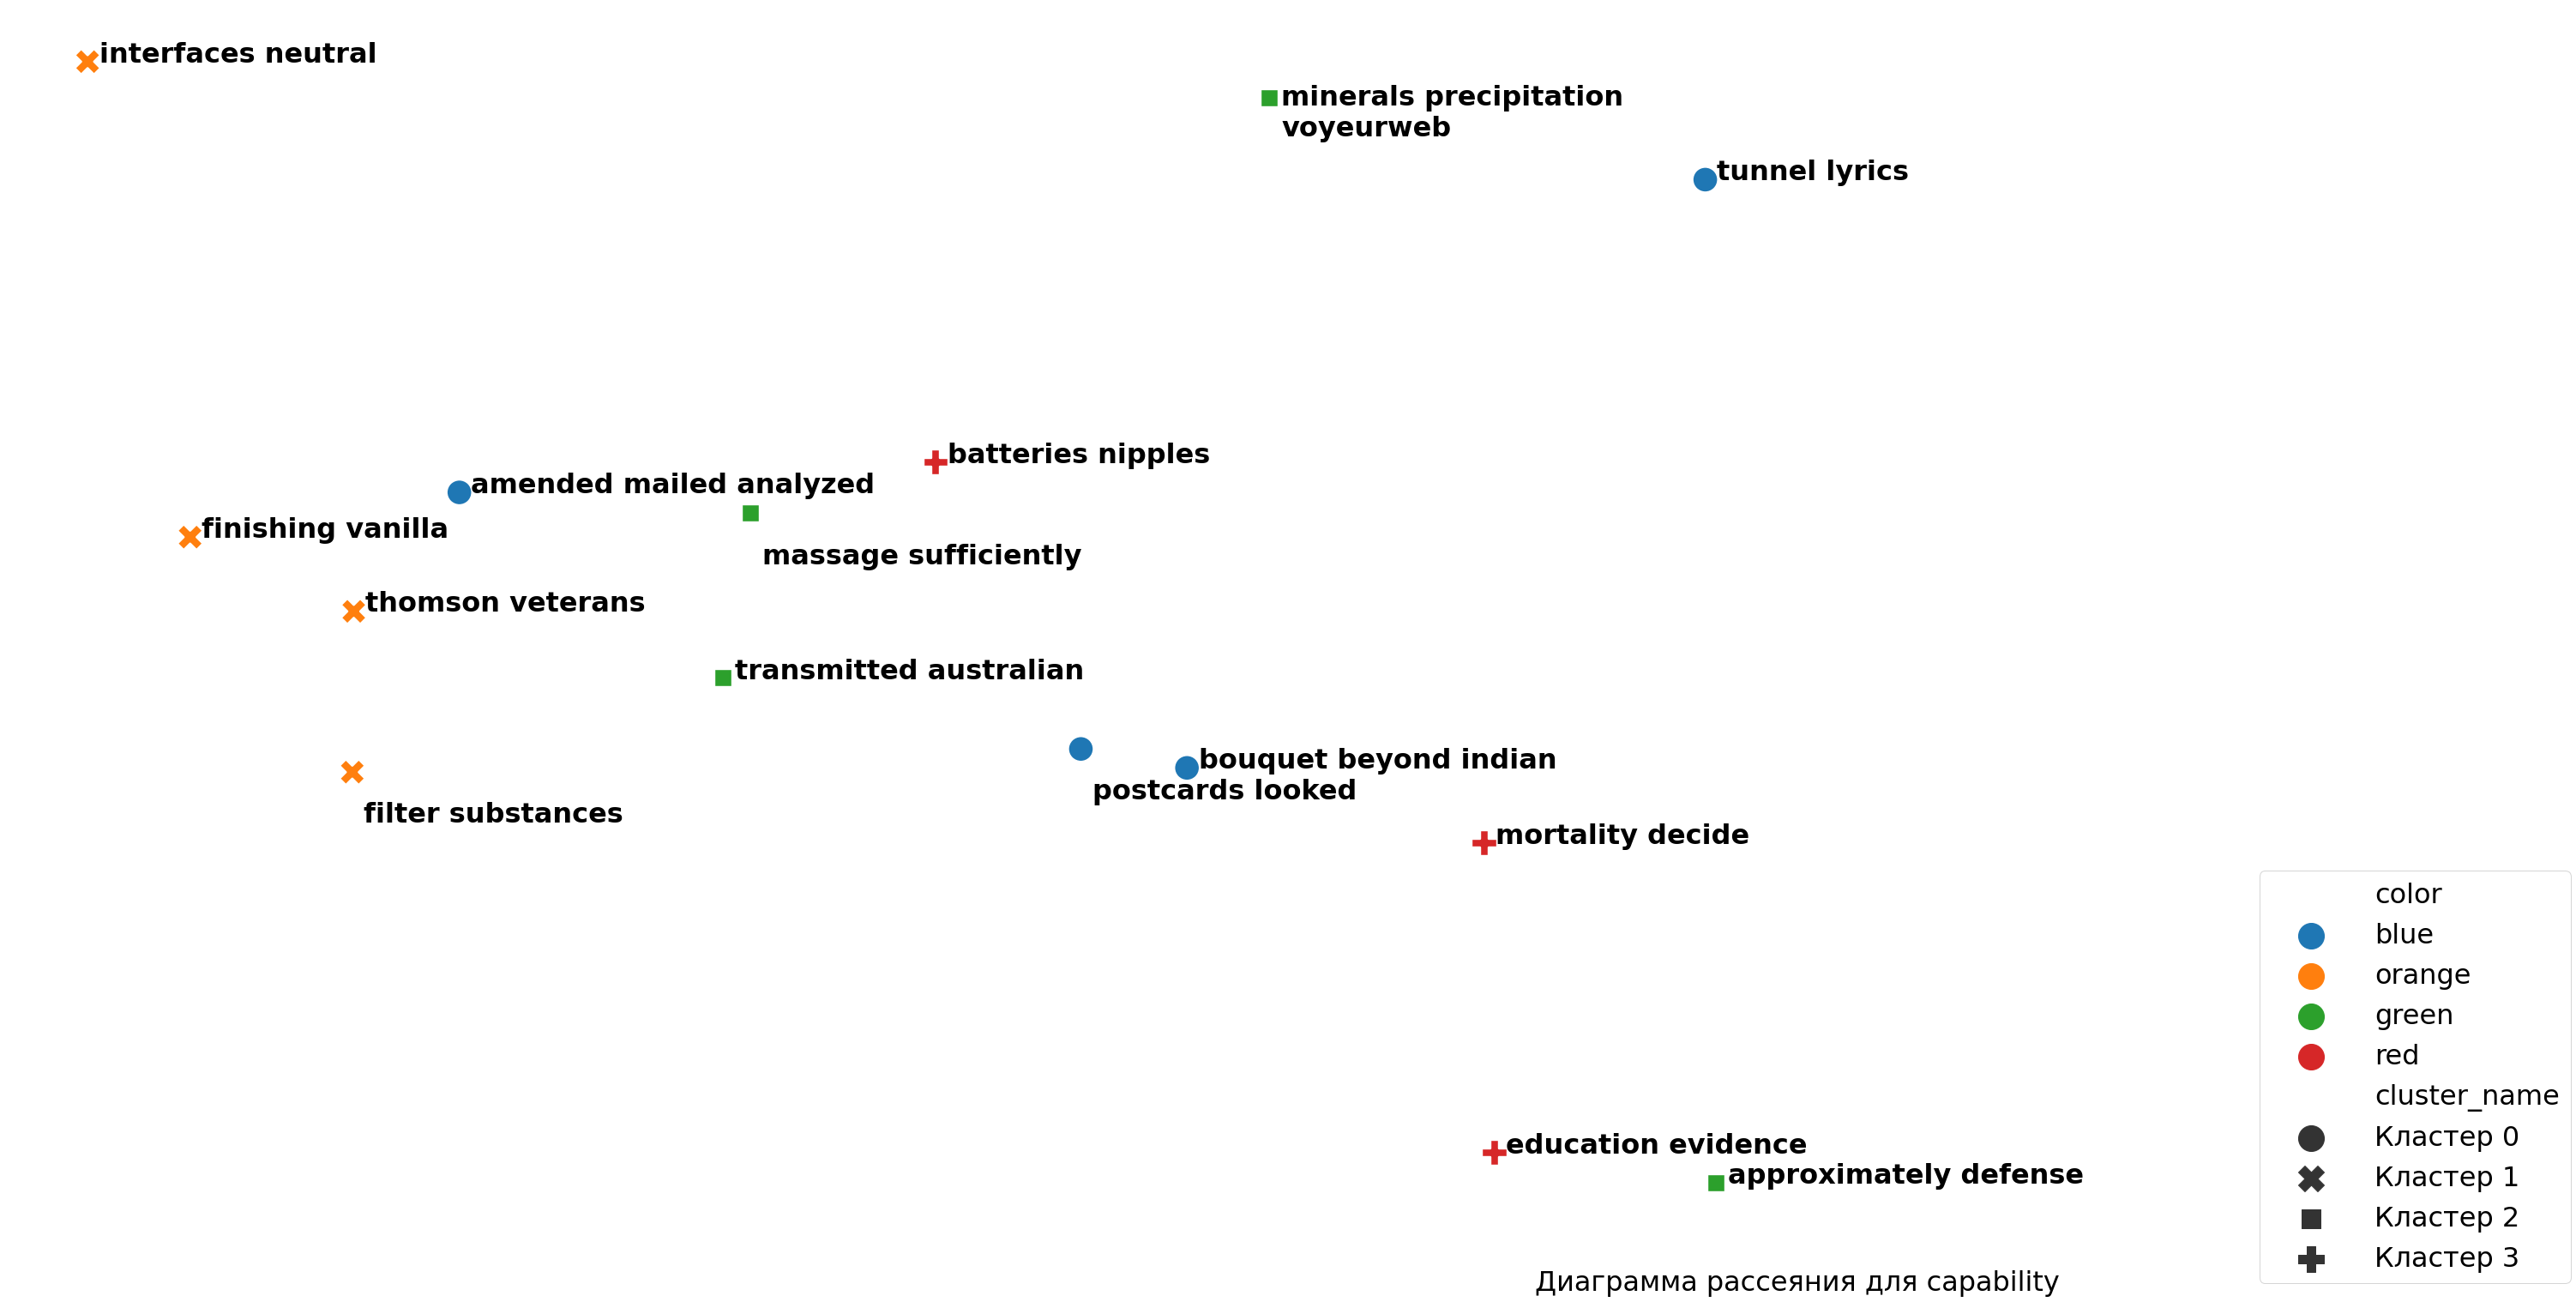

In [16]:
plot_graph('capability', t_x=1, t_y=-0.045, k1=-1.35, k2=+0, k3=-2.5)

## dialog

In [17]:
cur_df = res.loc[res['area'] == 'dialog']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

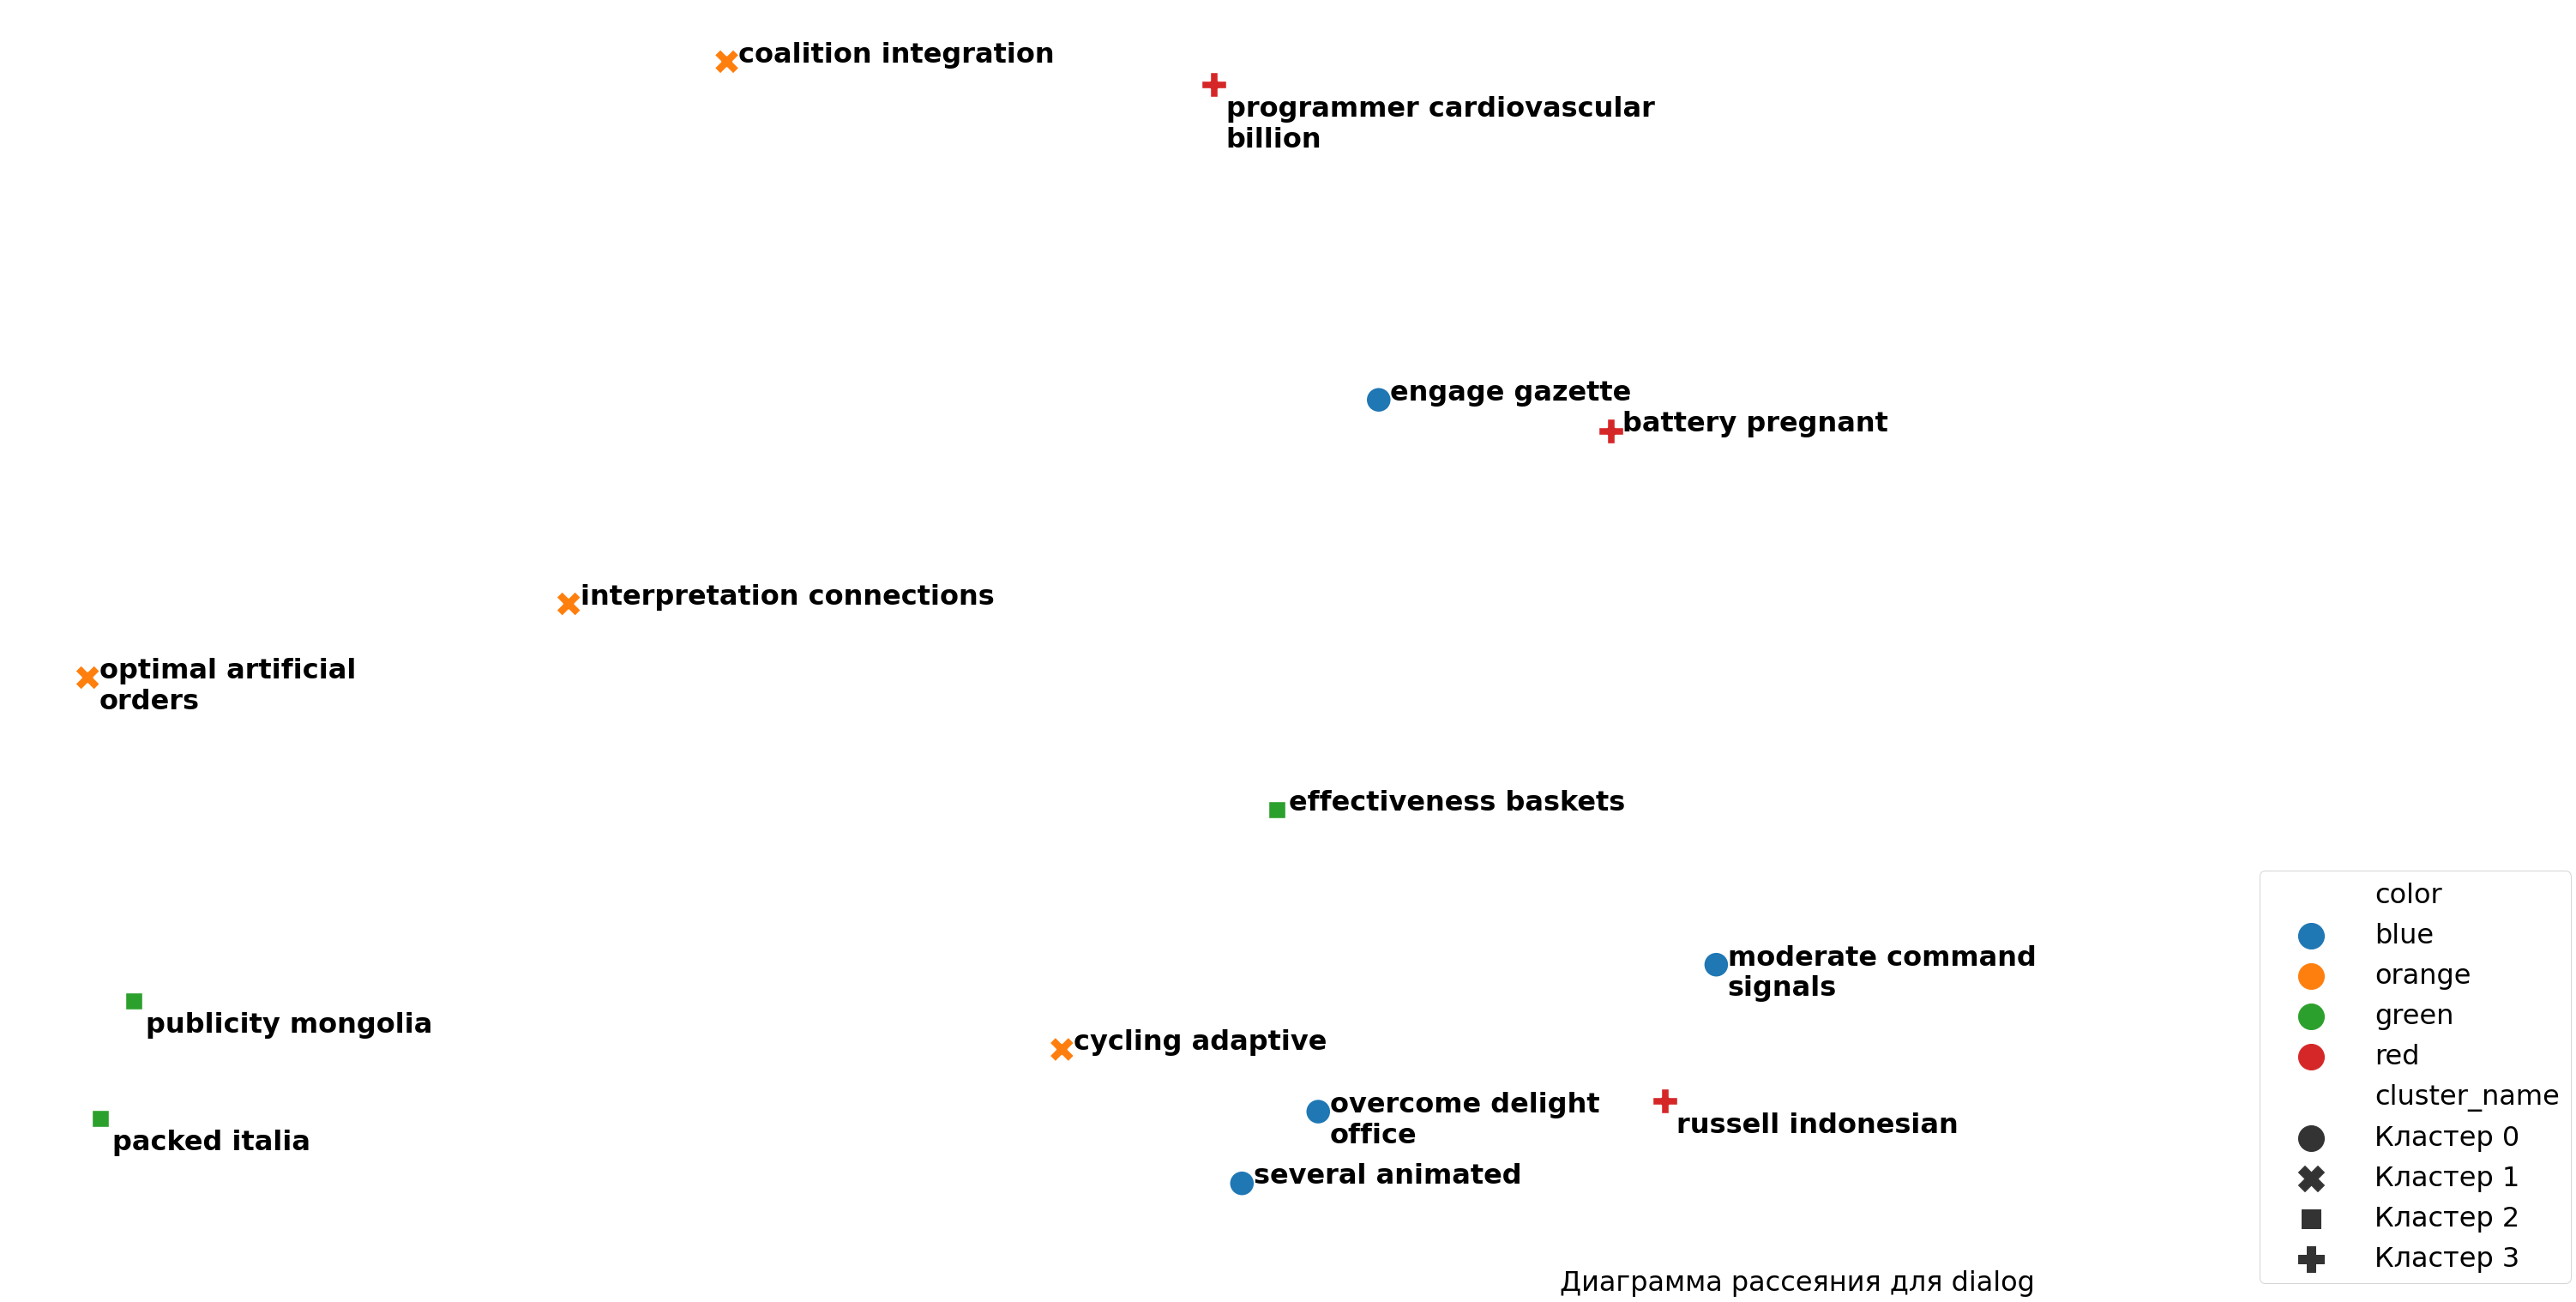

In [18]:
plot_graph('dialog', t_x=1, t_y=-0.045, k1=-1, k2=+0, k3=-2.5)

## eligibility

In [19]:
cur_df = res.loc[res['area'] == 'eligibility']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

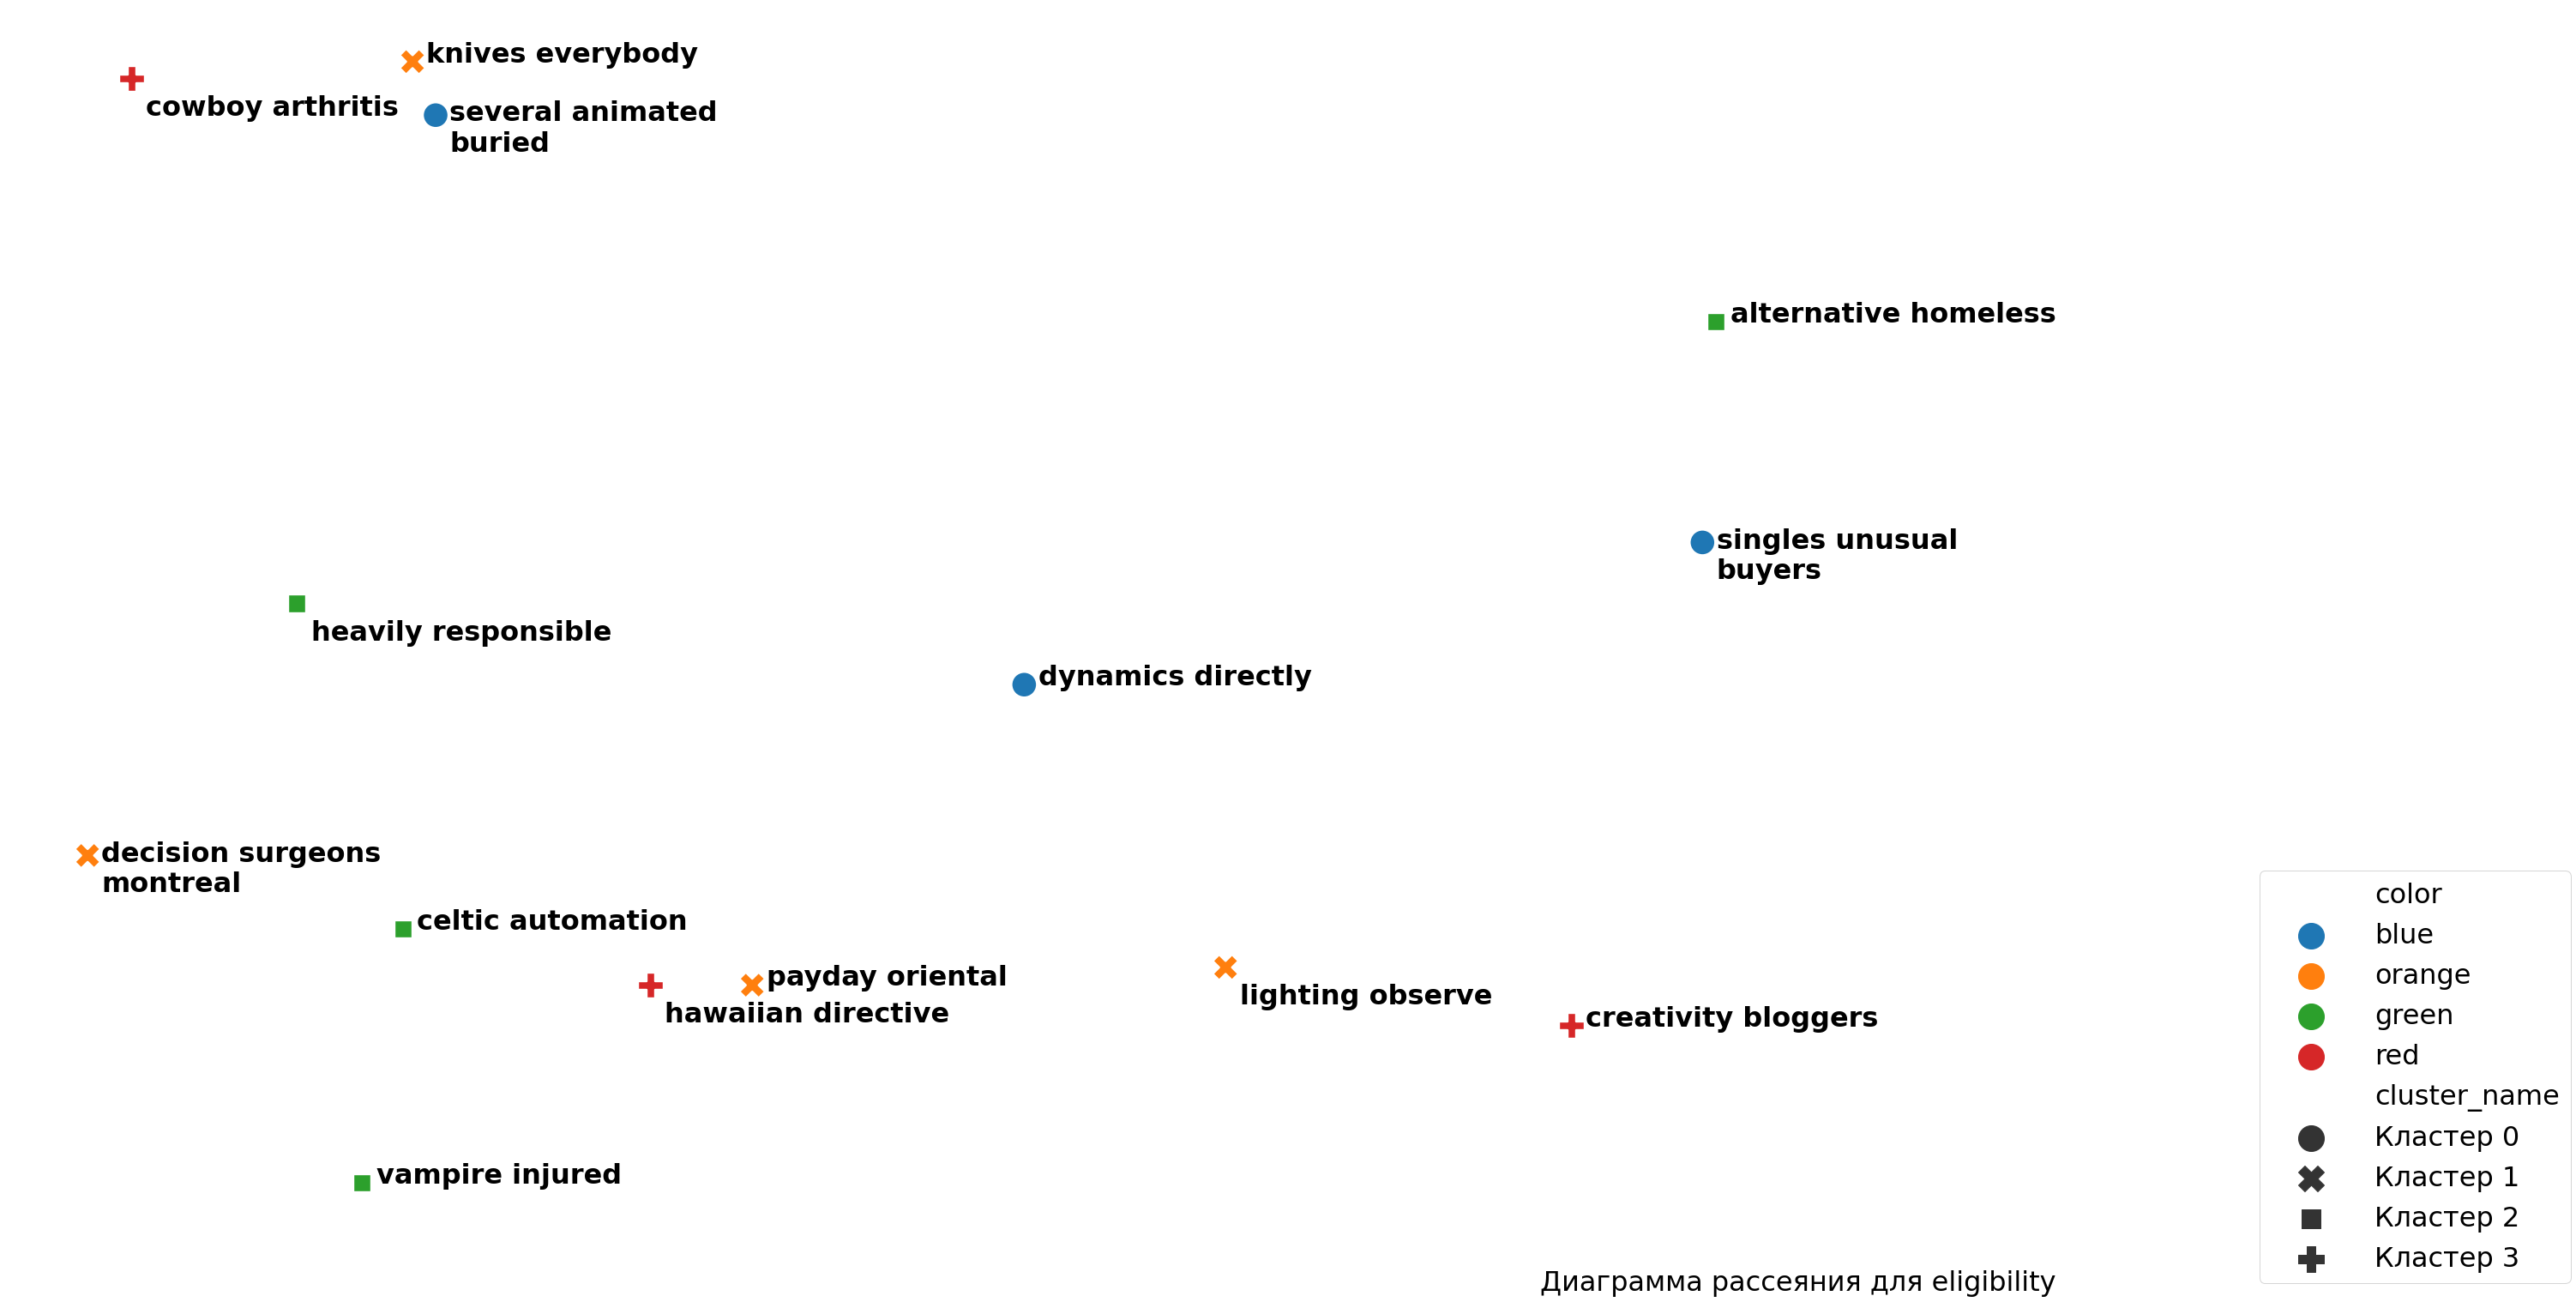

In [20]:
plot_graph('eligibility', t_x=1, t_y=-0.045, k1=-1, k2=+0, k3=-2.5)

## except

In [21]:
cur_df = res.loc[res['area'] == 'except']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

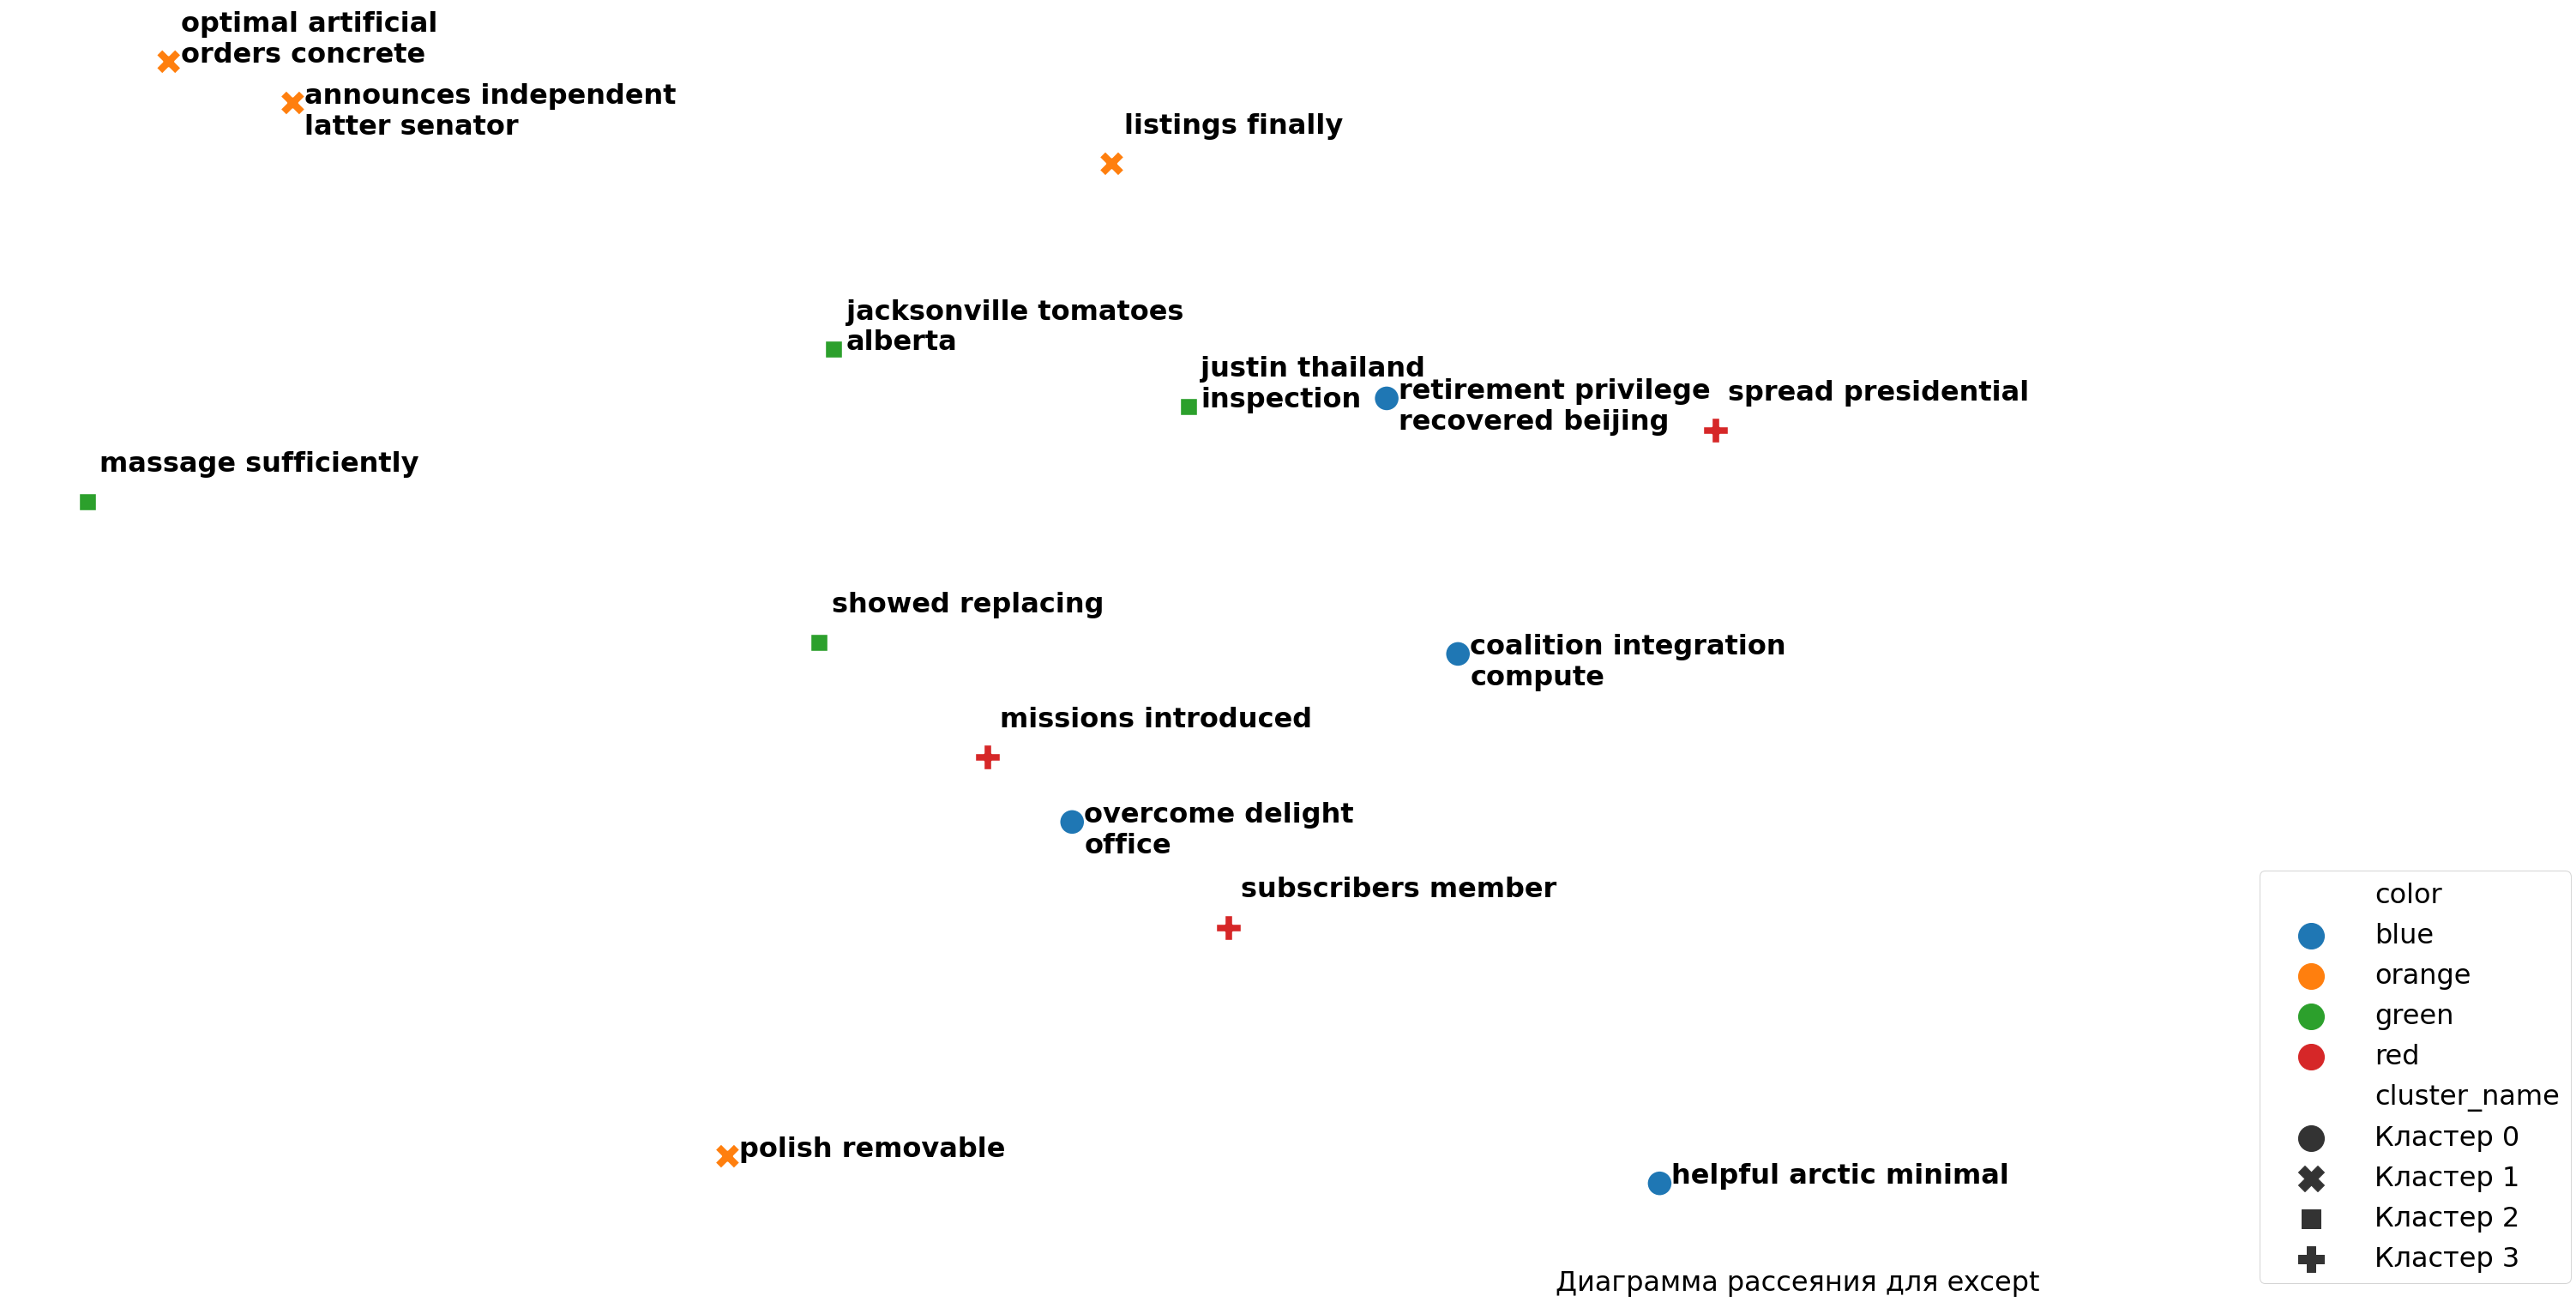

In [22]:
plot_graph('except', t_x=1, t_y=-0.045, k1=1, k2=+0, k3=-5.5, k5=5.5)

## greetings

In [23]:
cur_df = res.loc[res['area'] == 'greetings']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

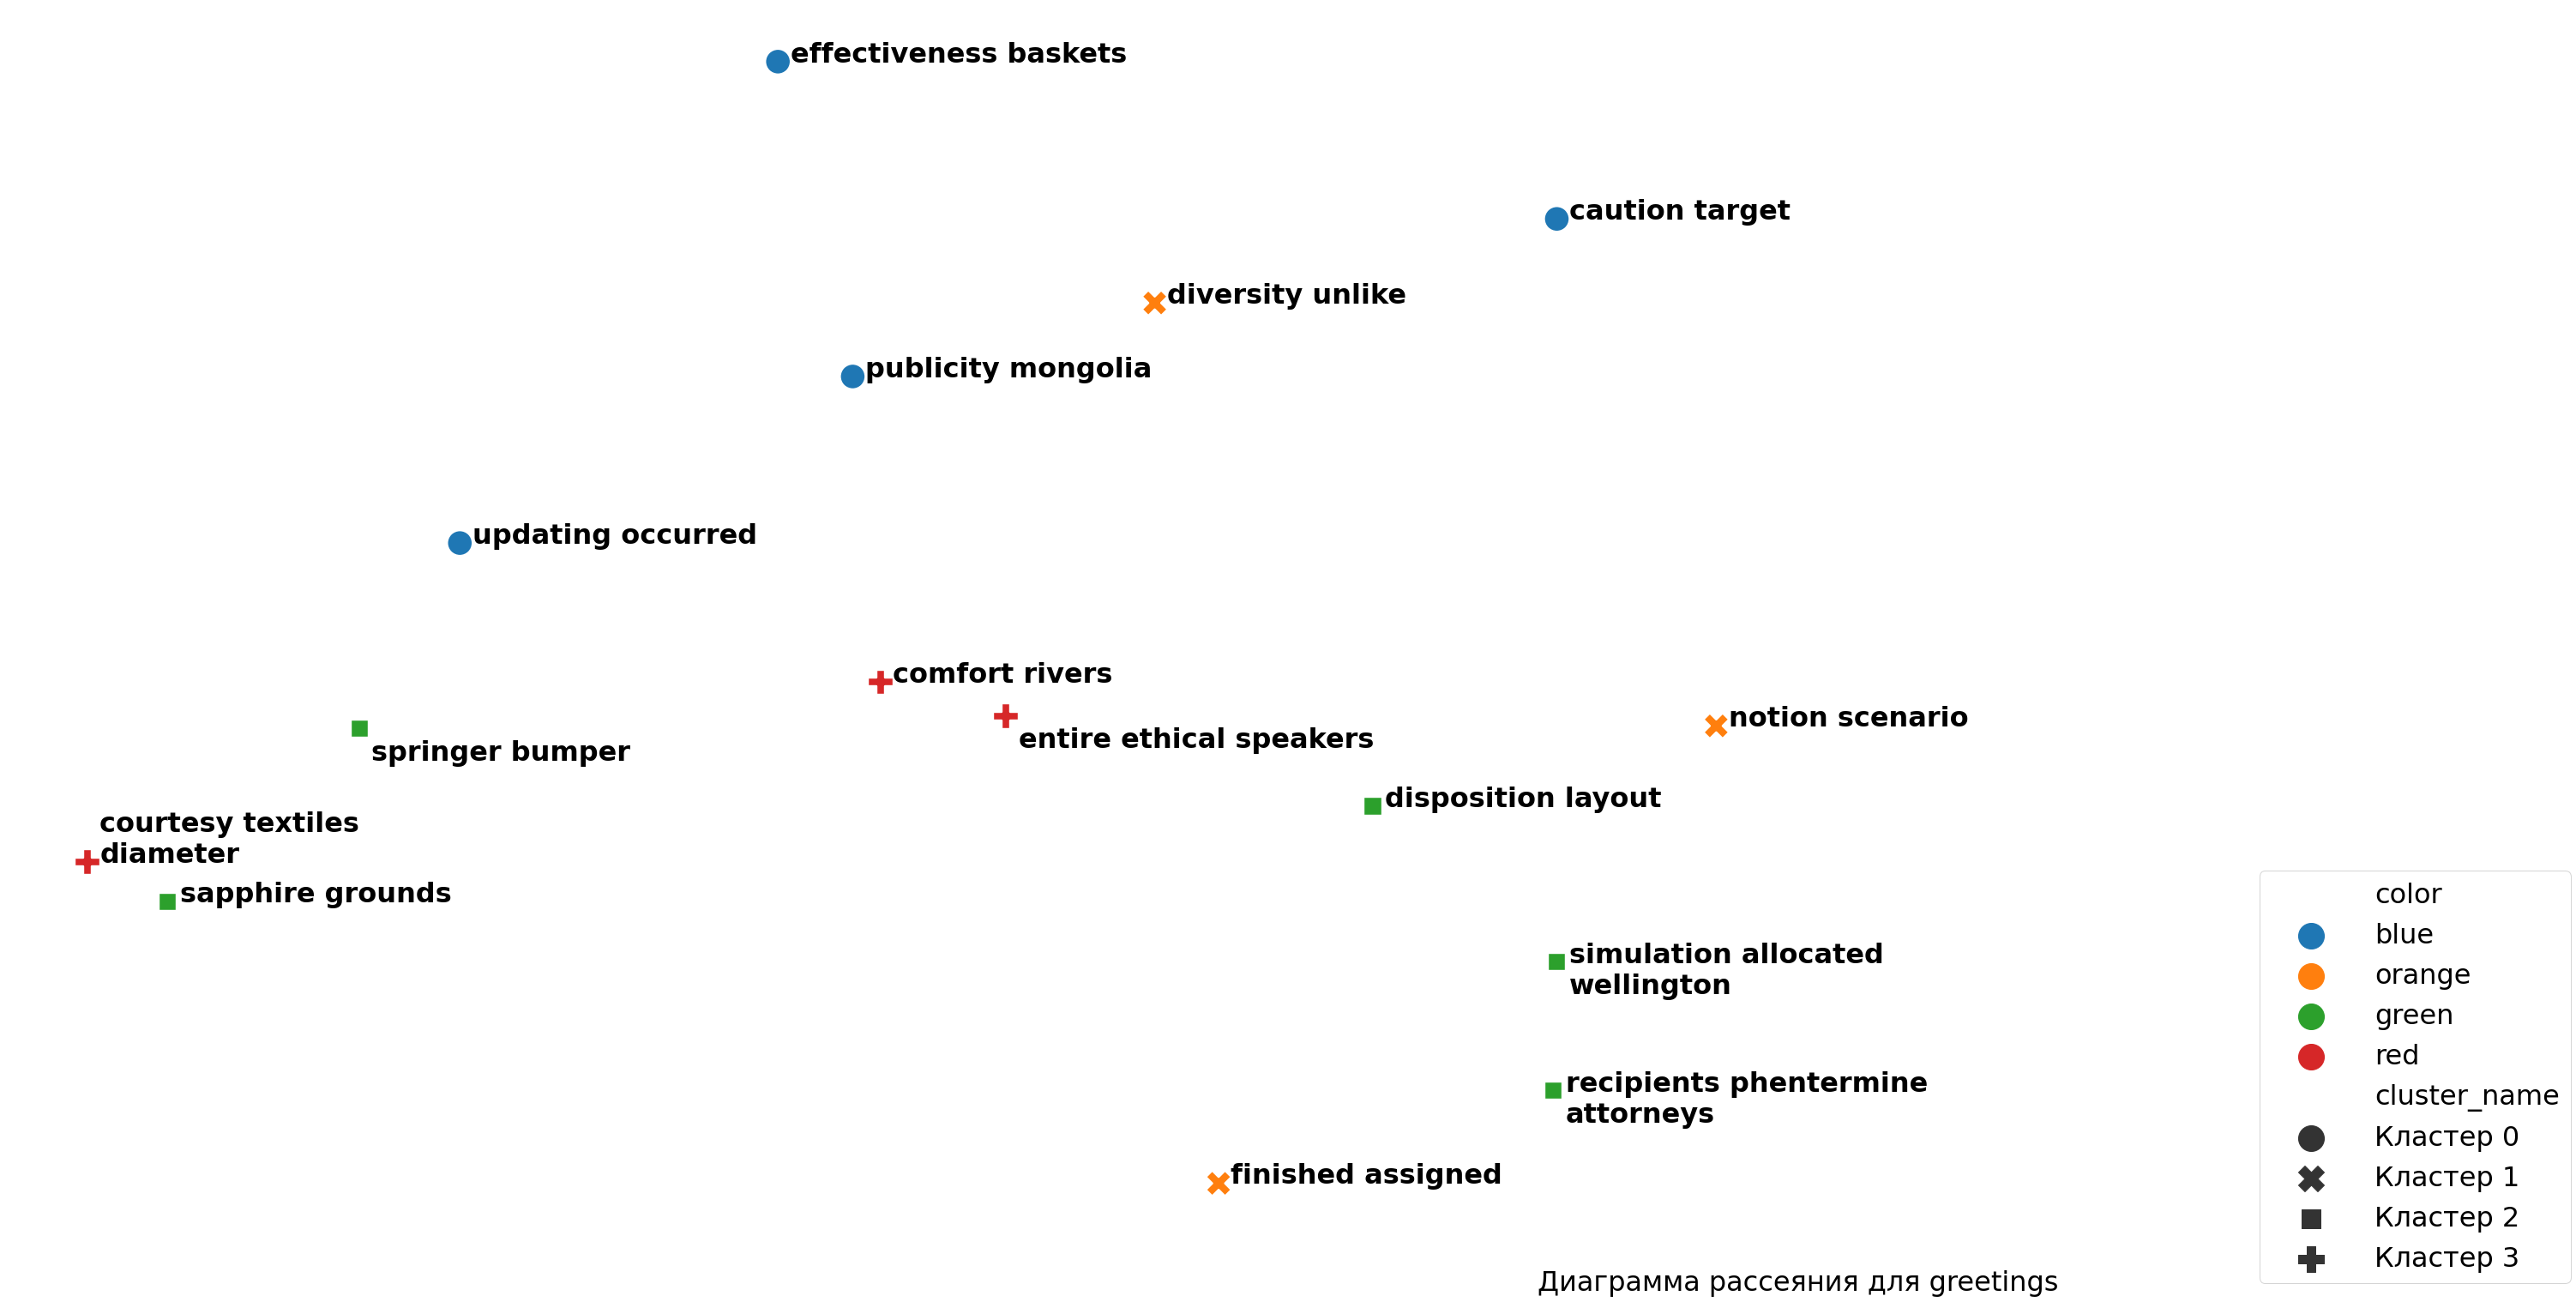

In [24]:
plot_graph('greetings', t_x=1, t_y=-0.045, k1=-1, k2=+0, k3=-2.5, n=1)

# В данном случае расположение одной записи исправляем вручную
text = cur_df.keyword[14]
y_position = cur_df.y[14]
carry_flag = False

if len(text) > SYMBOLS_FOR_CARRY:
  if text[SYMBOLS_FOR_CARRY-1:].find(' ')>0:
    pos = text[SYMBOLS_FOR_CARRY-1:].find(' ')
    # print(pos)
    # print(text[:14+pos]+'\n'+text[15+pos:])
    text = text[:SYMBOLS_FOR_CARRY-1+pos]+'\n'+text[SYMBOLS_FOR_CARRY+pos:]
    y_position = y_position-ONE_LINE_SIZE
    carry_flag = True
    
plt.text(cur_df.x[14]+BIAS, y_position+ONE_LINE_SIZE, text, horizontalalignment='left', size=TEXT_SIZE, color='black', weight='semibold')
plt.show()

## housewives

In [25]:
cur_df = res.loc[res['area'] == 'housewives']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

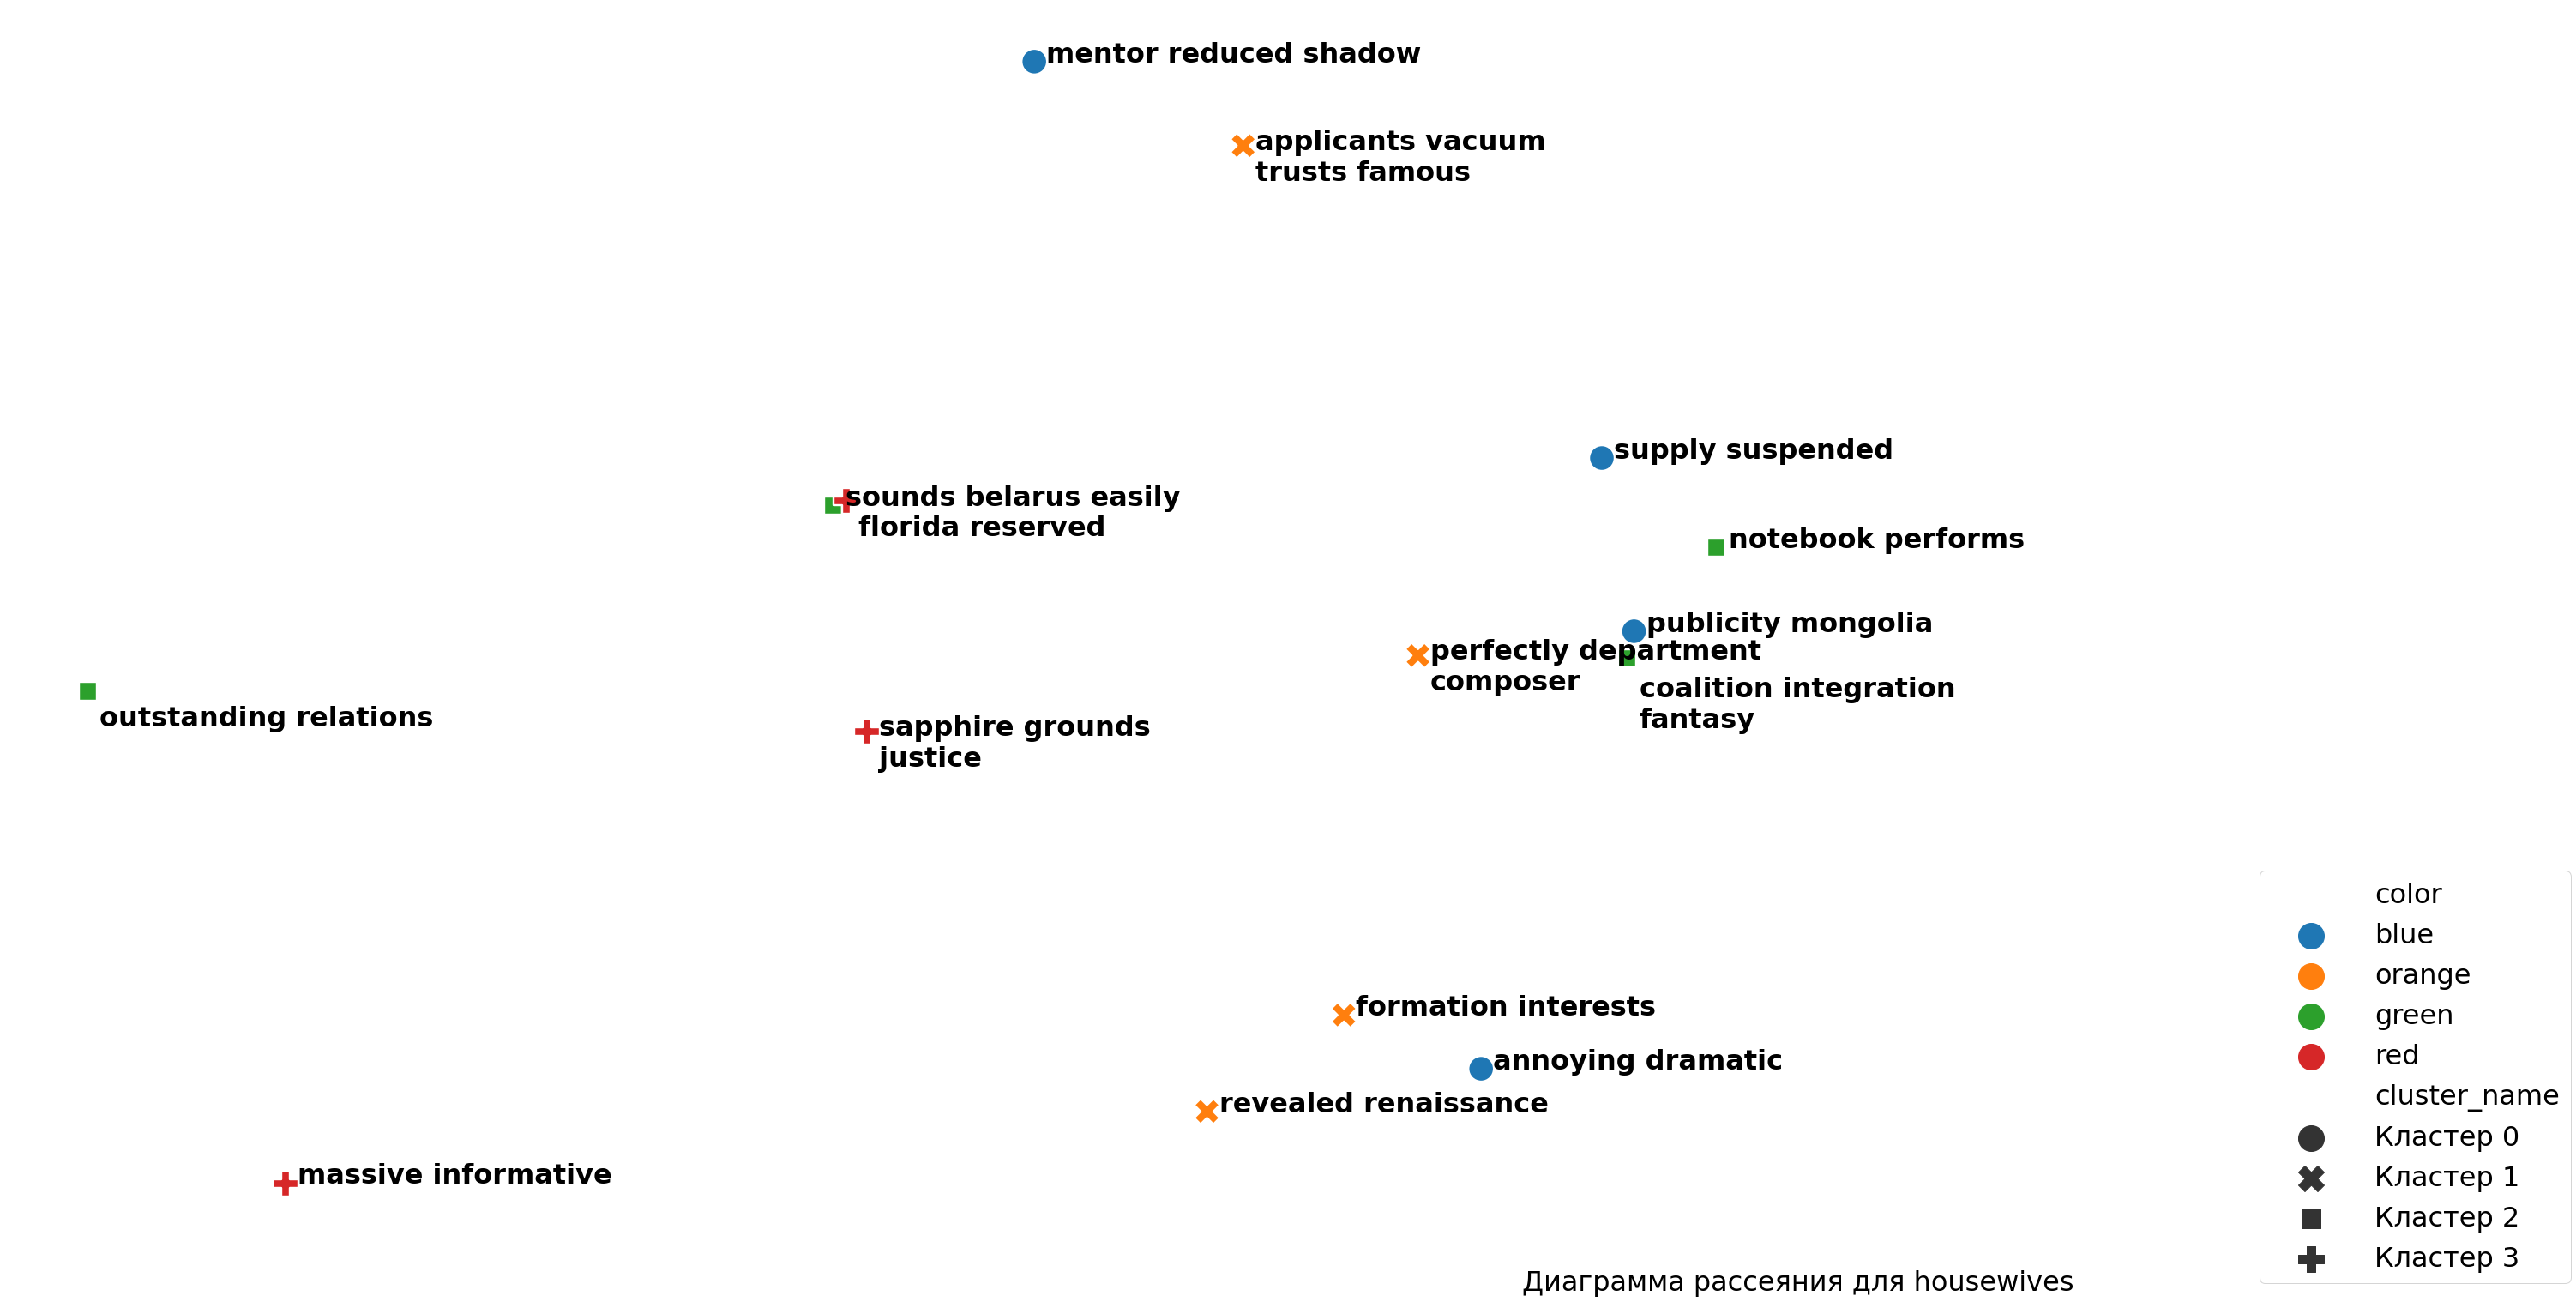

In [26]:
plot_graph('housewives', t_x=1, t_y=-0.045, k1=-1, k2=+0, k3=-1.5, k4=0.3)

## lithuania

In [27]:
cur_df = res.loc[res['area'] == 'lithuania']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

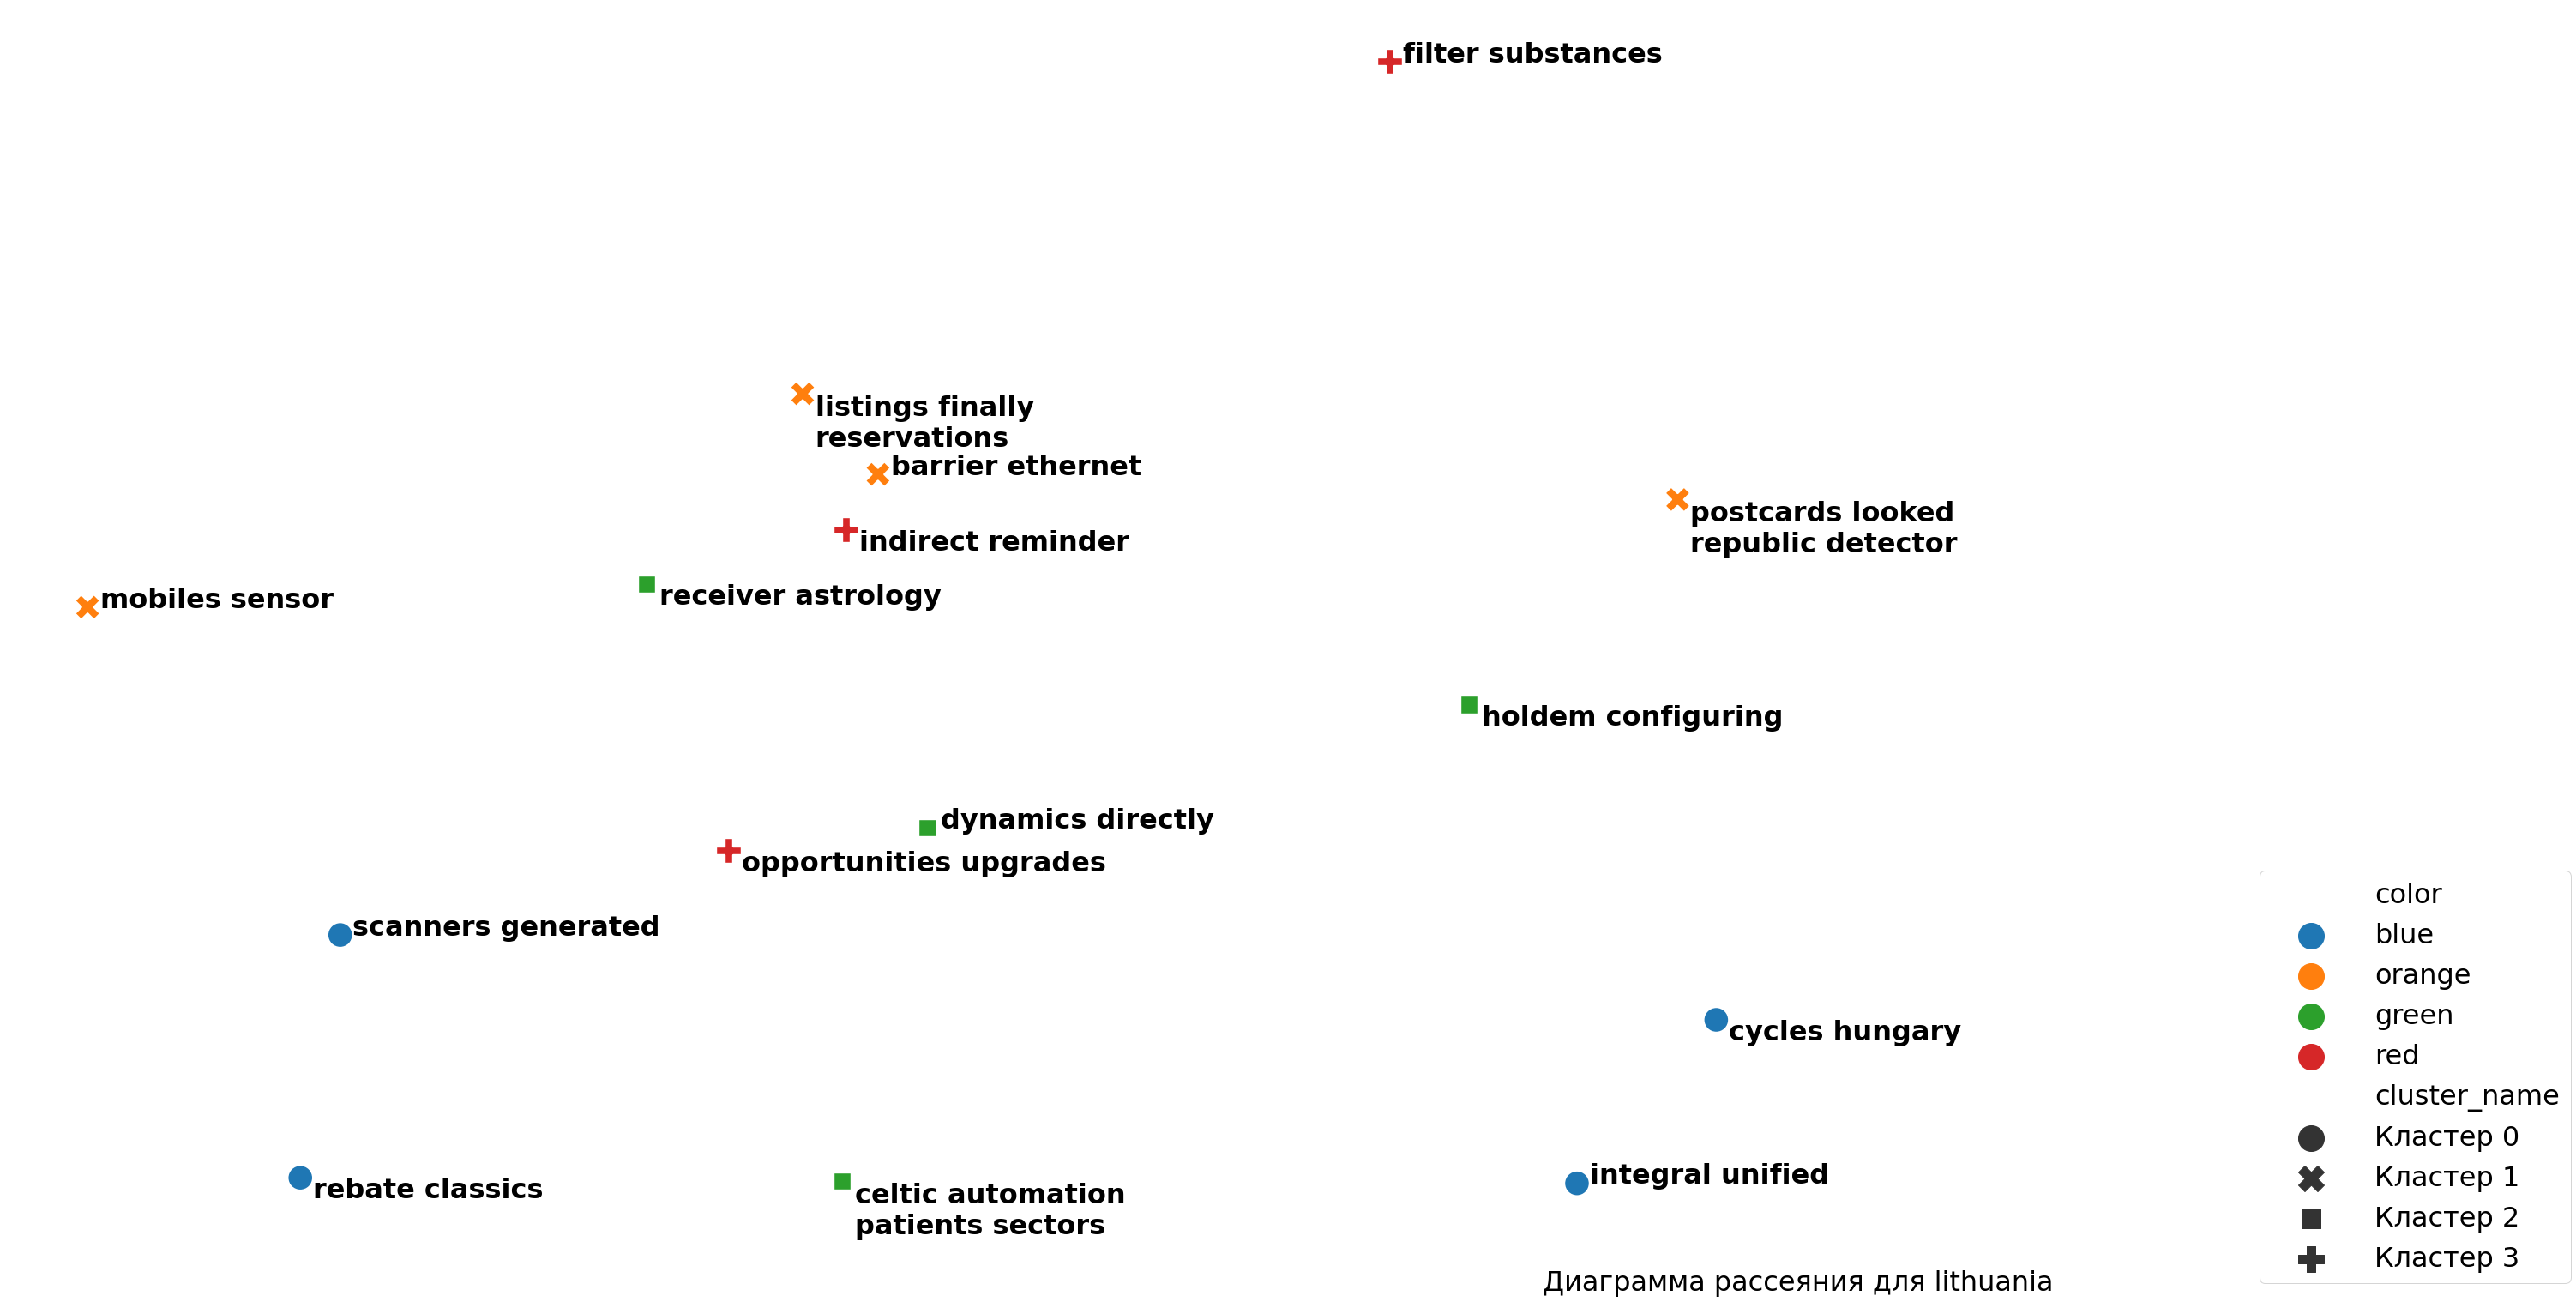

In [28]:
plot_graph('lithuania', t_x=1, t_y=-0.045, k1=-0.6, k2=+0, k3=-2.5, k4=4)

## locator

In [29]:
cur_df = res.loc[res['area'] == 'locator']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

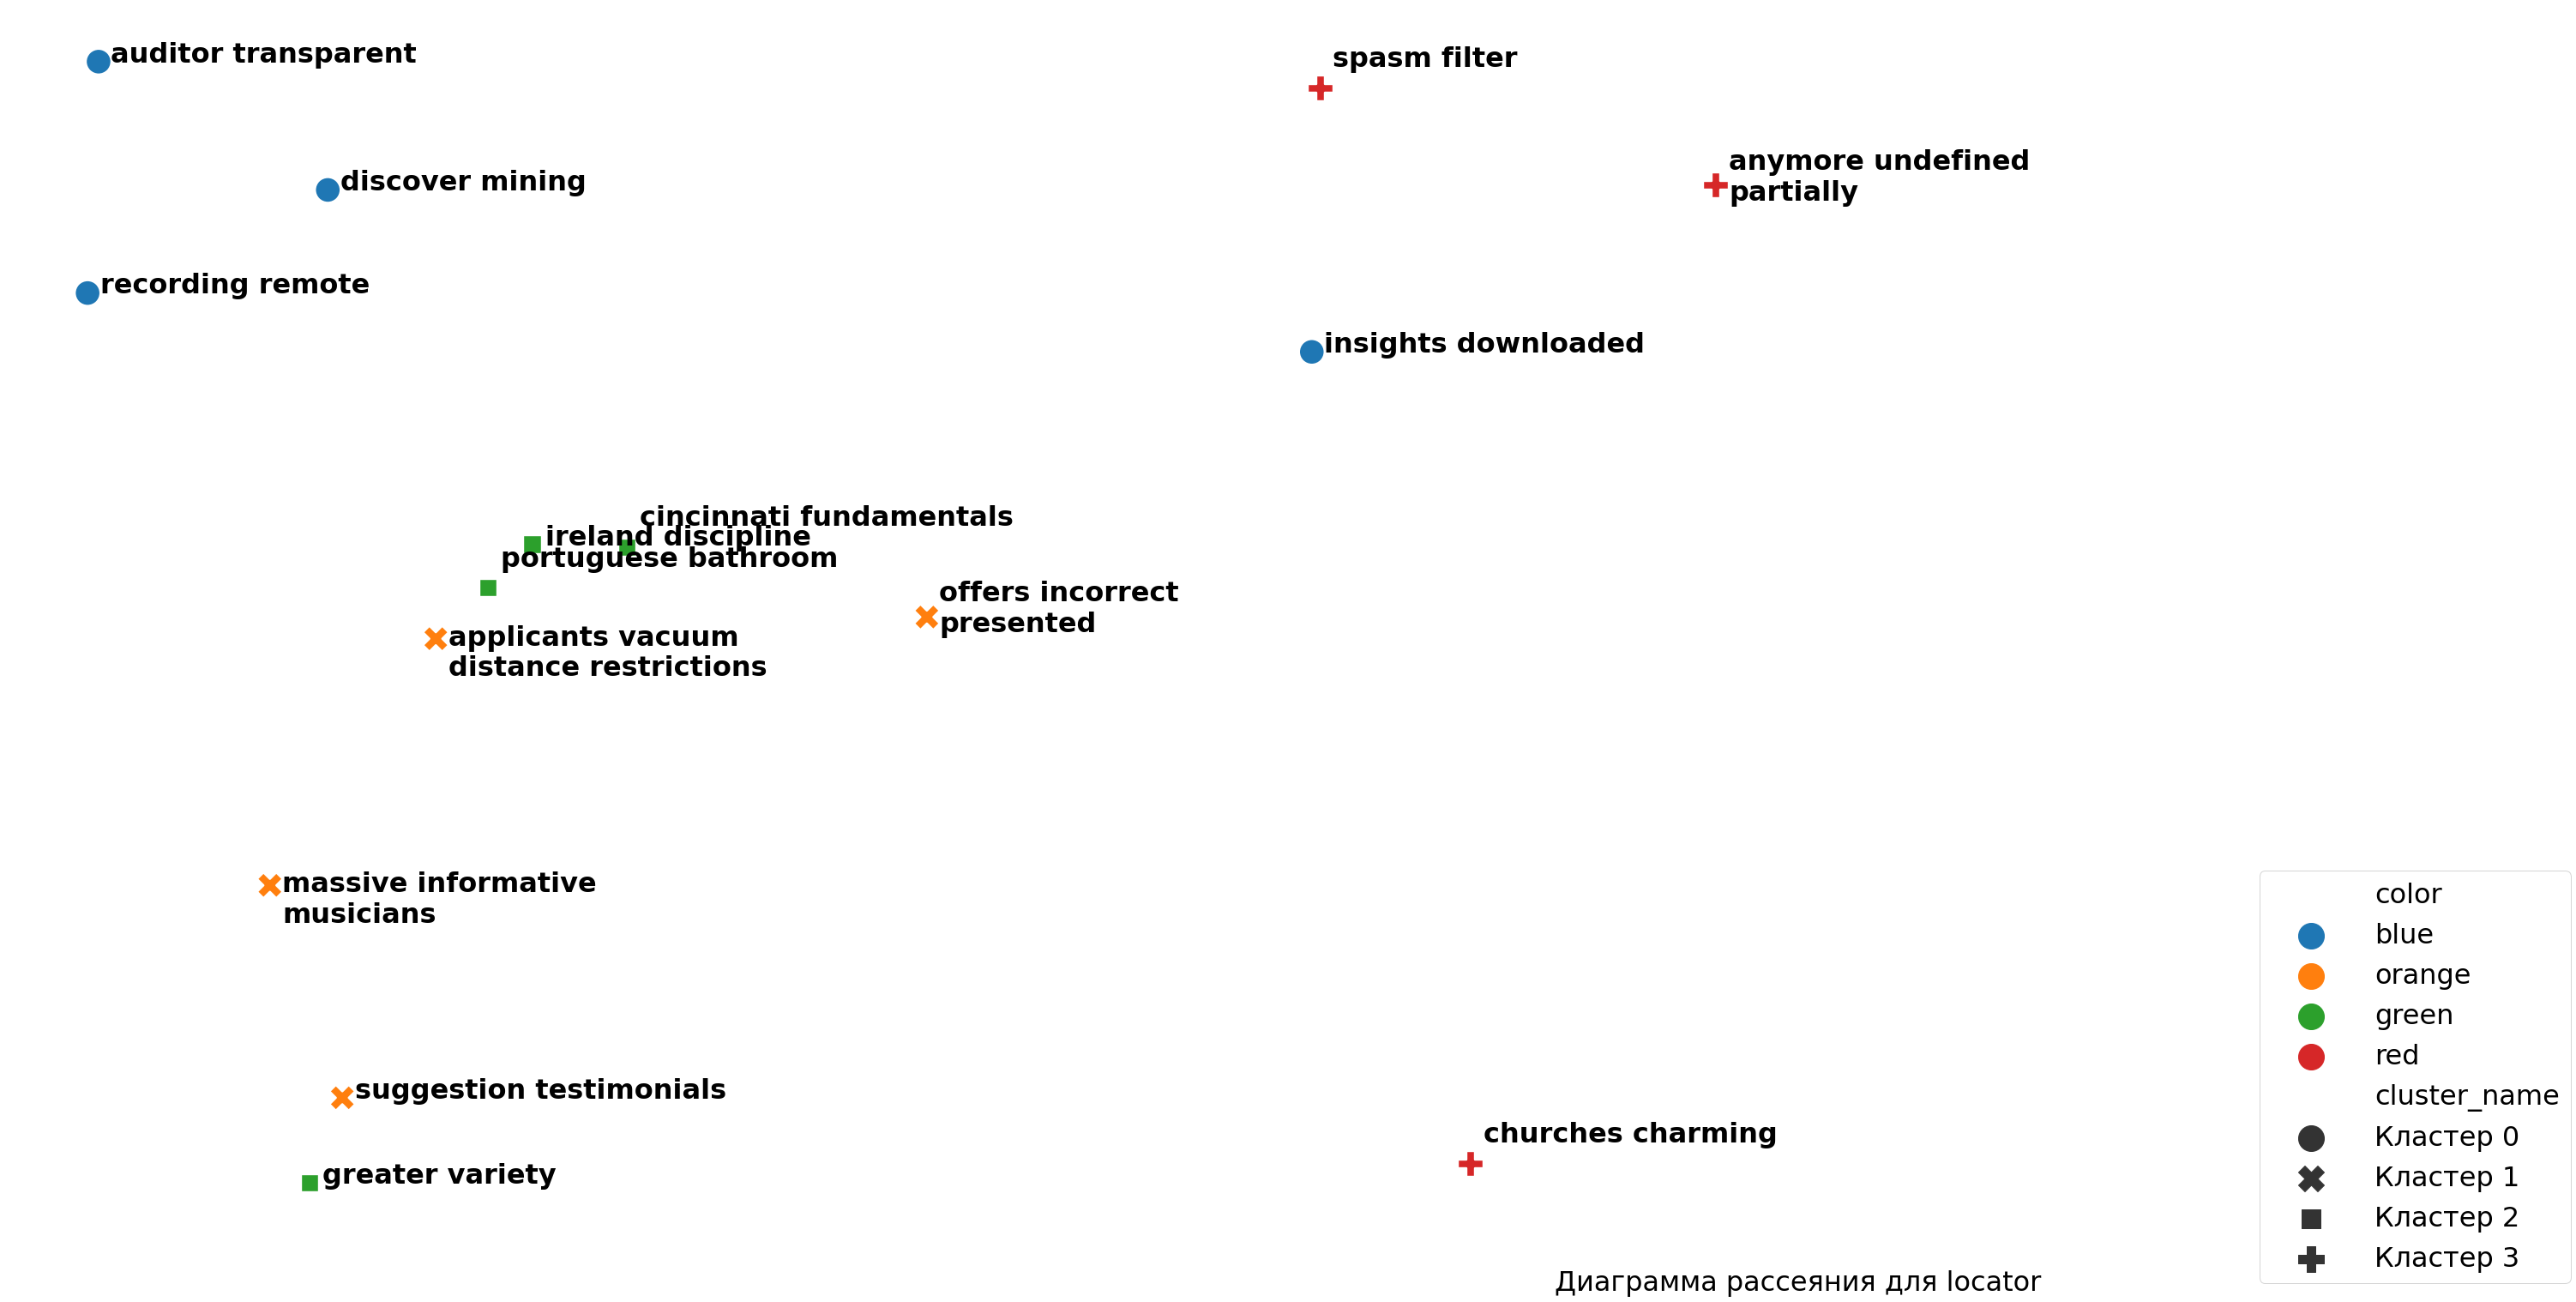

In [30]:
plot_graph('locator', t_x=1, t_y=-0.045, k1=0.6, k2=+0, k3=-2.5)

## personnel

In [31]:
cur_df = res.loc[res['area'] == 'personnel']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

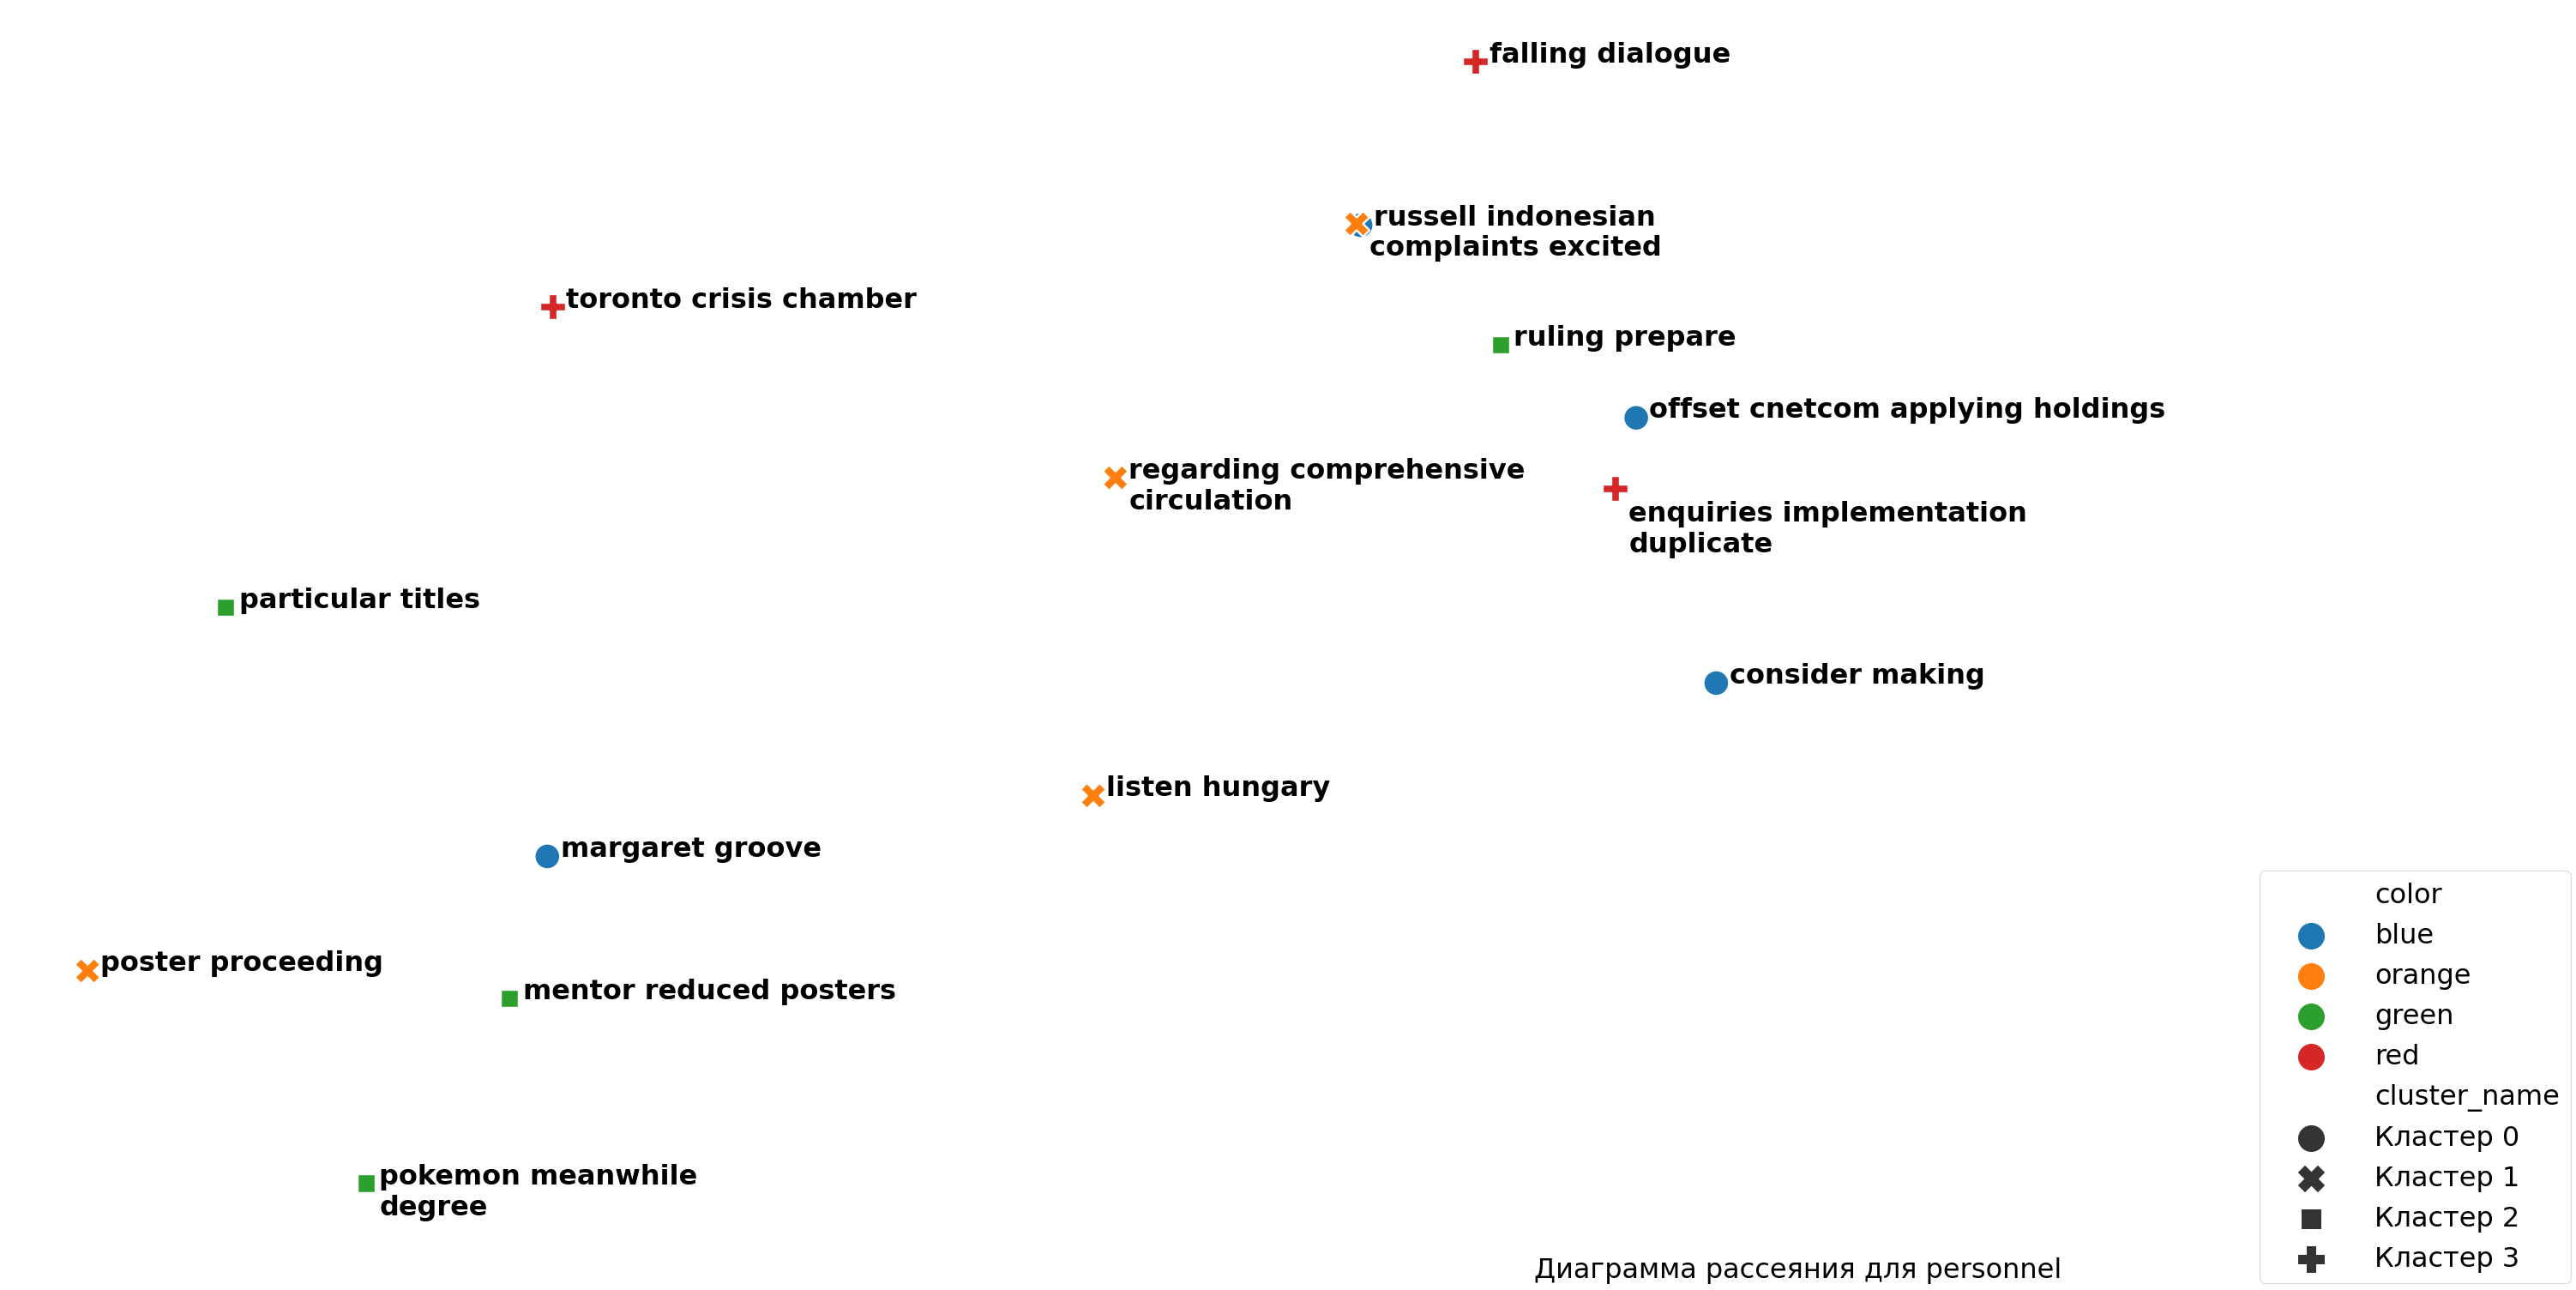

In [32]:
plot_graph('personnel', t_x=1, t_y=-0.035, k1=-1, k2=+0, k3=-2.5)

## protein

In [33]:
cur_df = res.loc[res['area'] == 'protein']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

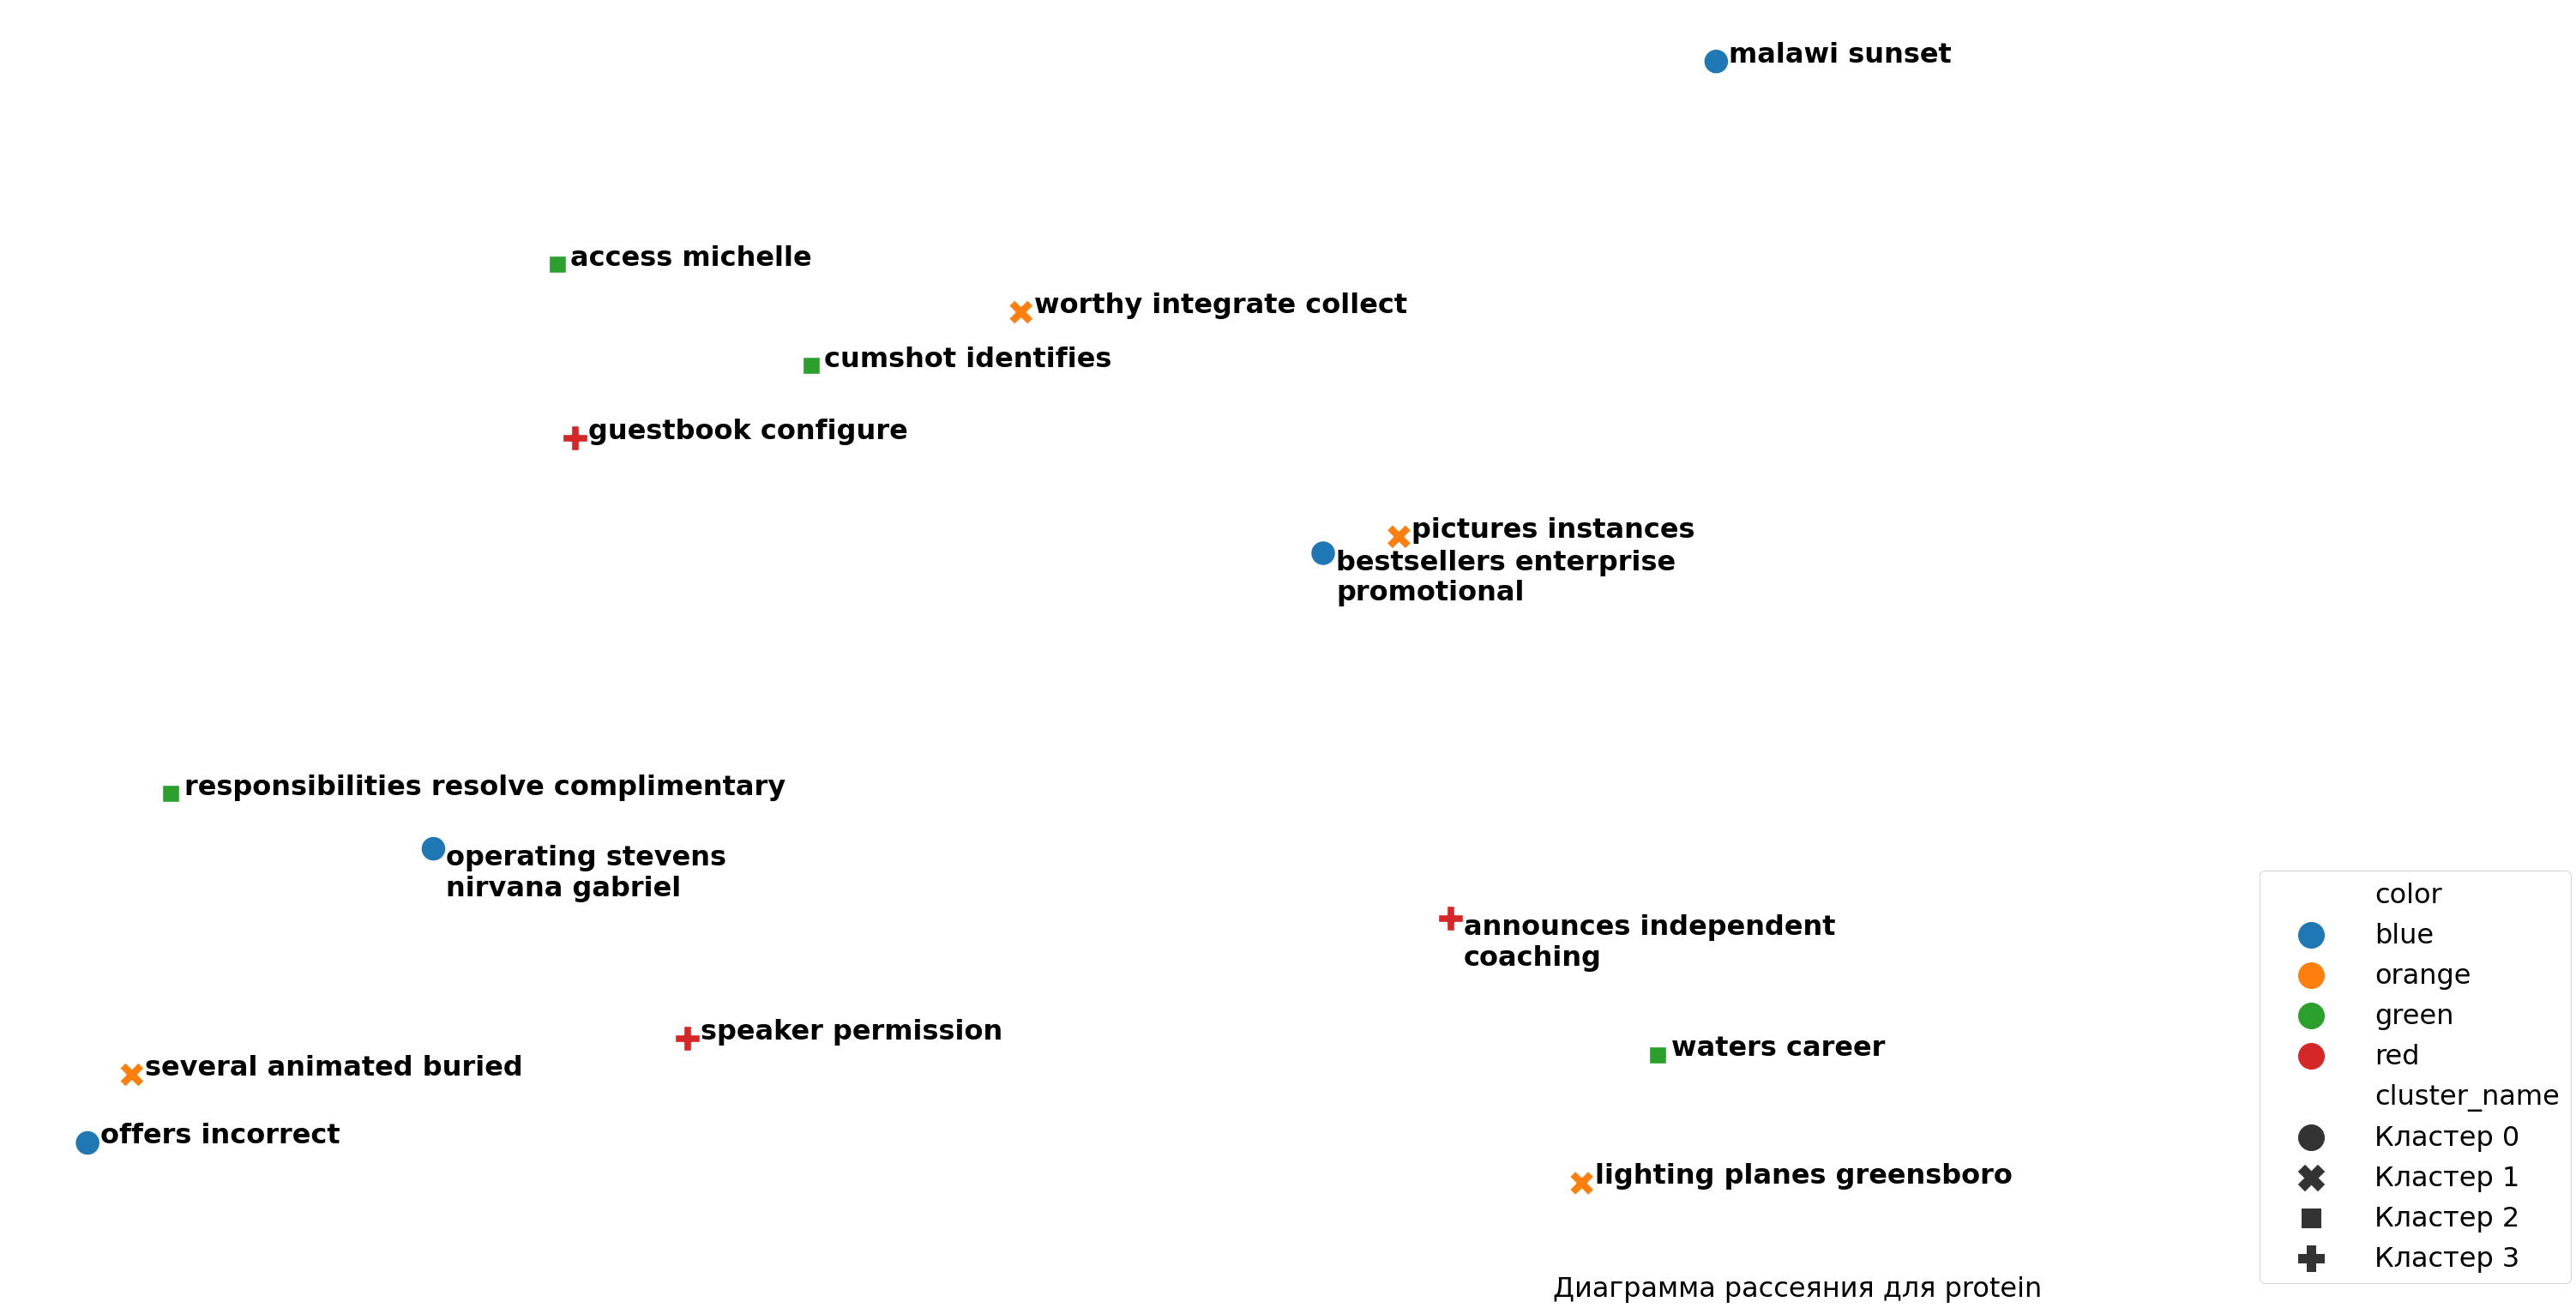

In [34]:
plot_graph('protein', t_x=1, t_y=-0.05, k1=0, k2=0, k3=-6.5, sym=2)

## twisted

In [35]:
cur_df = res.loc[res['area'] == 'twisted']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

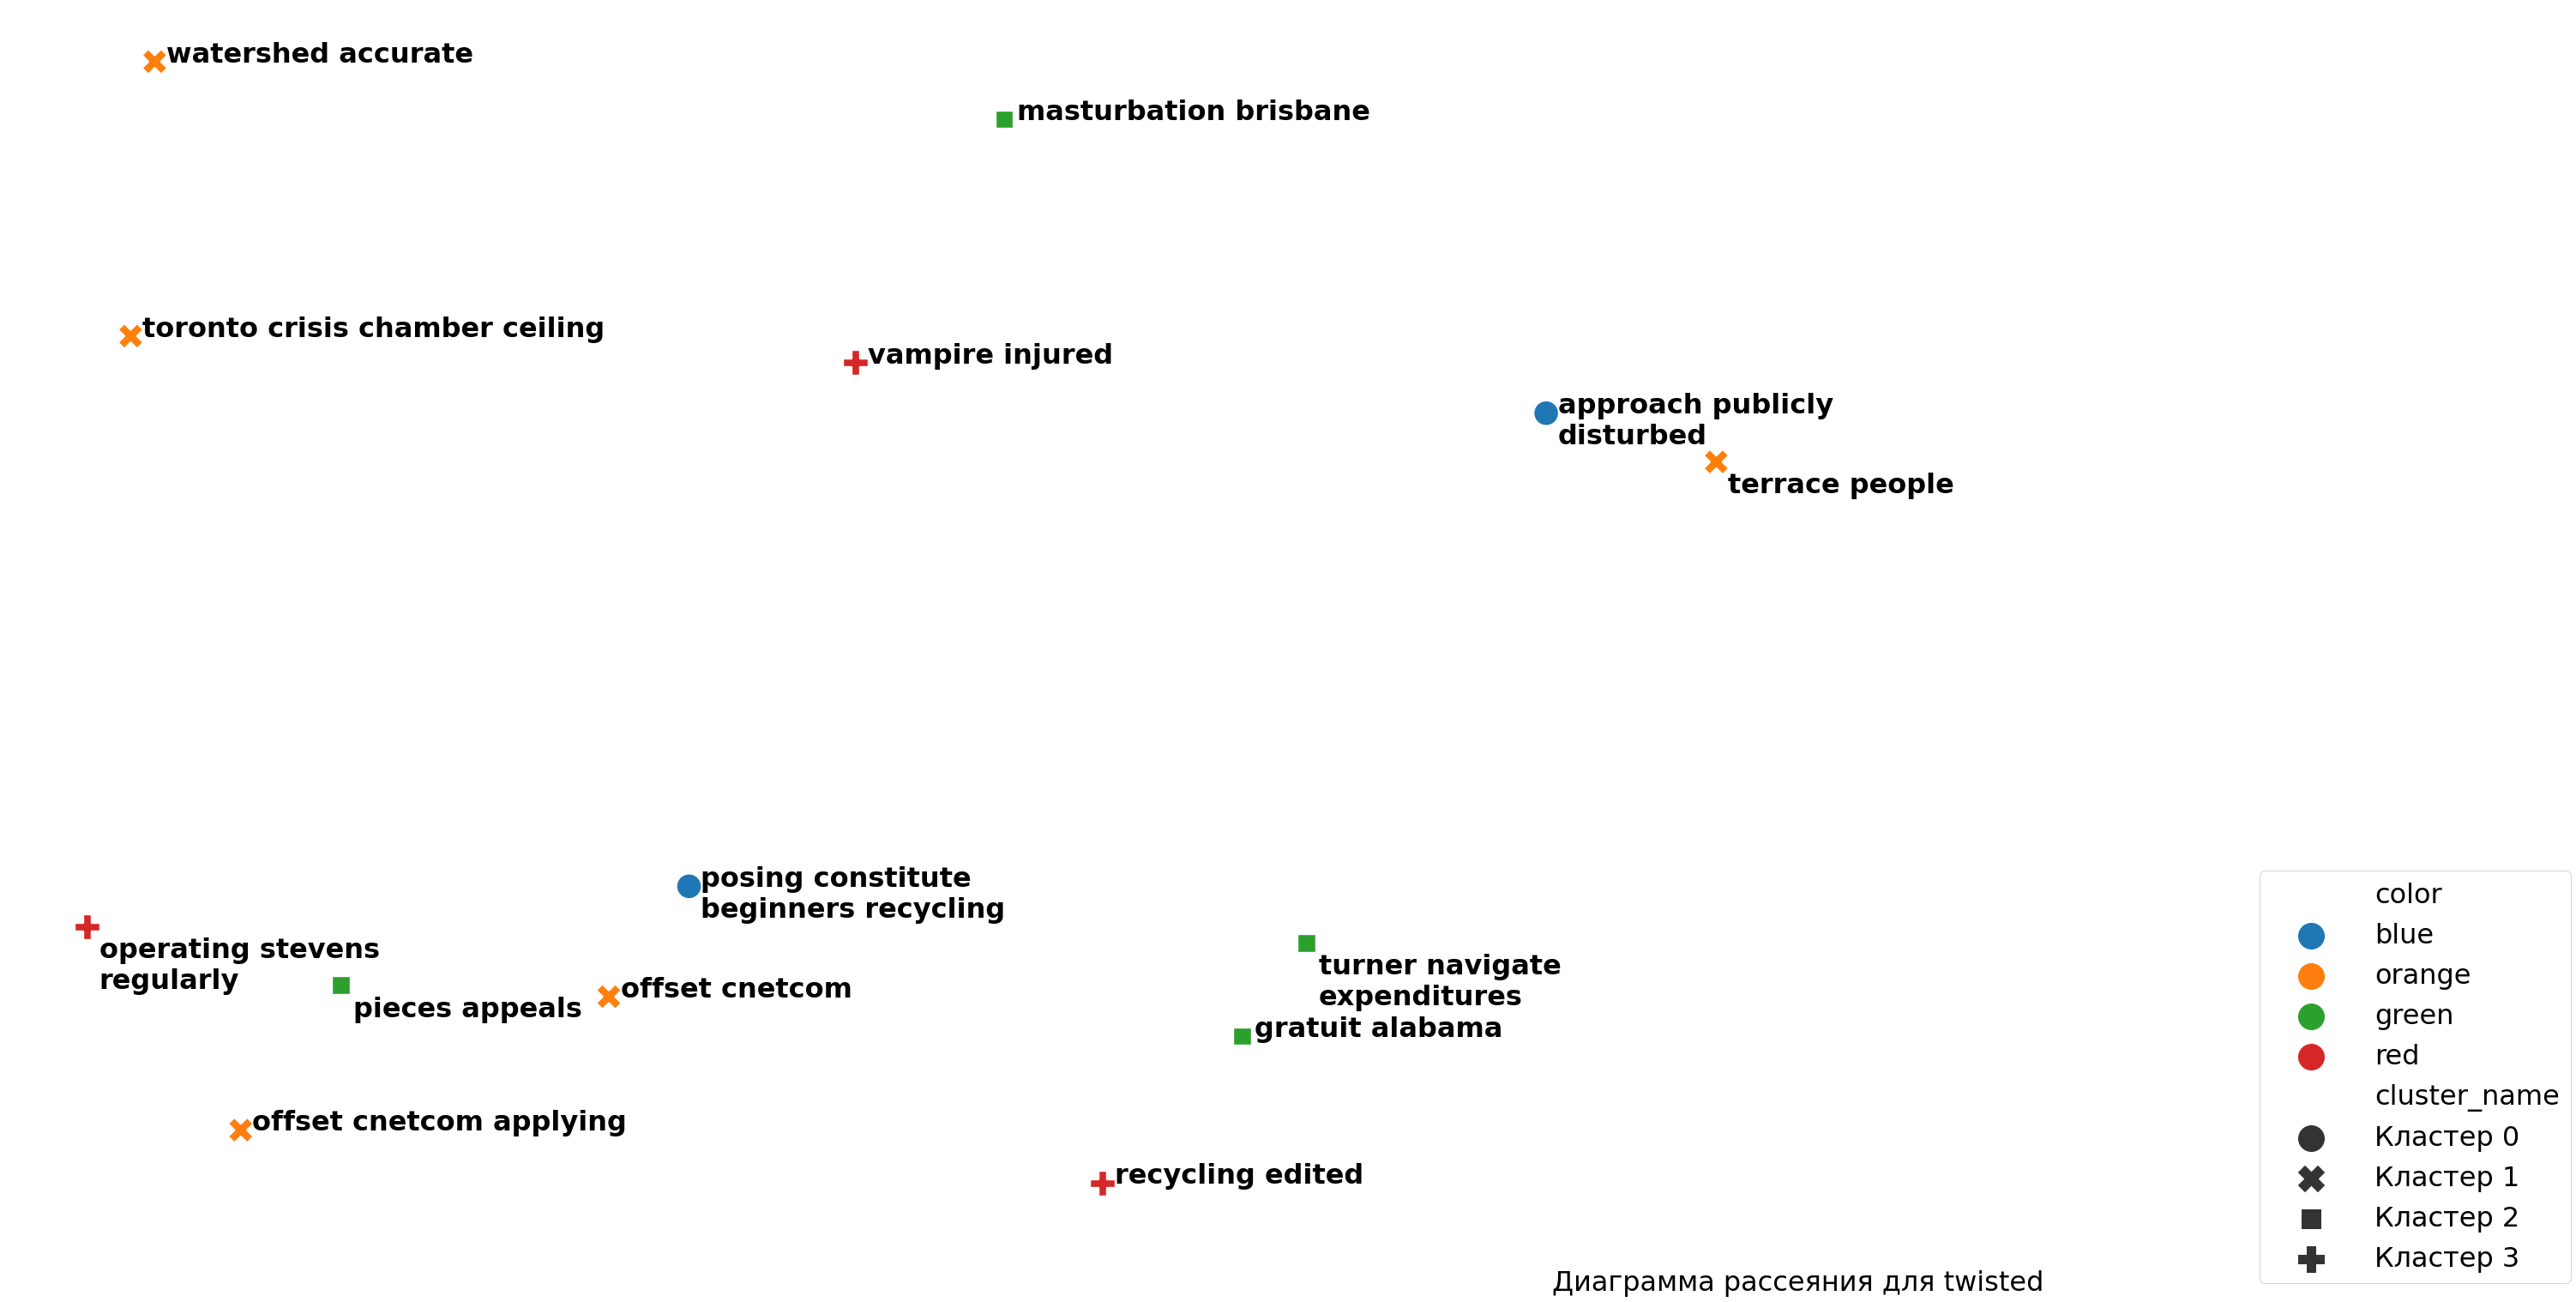

In [36]:
plot_graph('twisted', t_x=1, t_y=-0.045, k1=-1, k2=+0, k3=-2.5)

## winner

In [37]:
cur_df = res.loc[res['area'] == 'winner']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

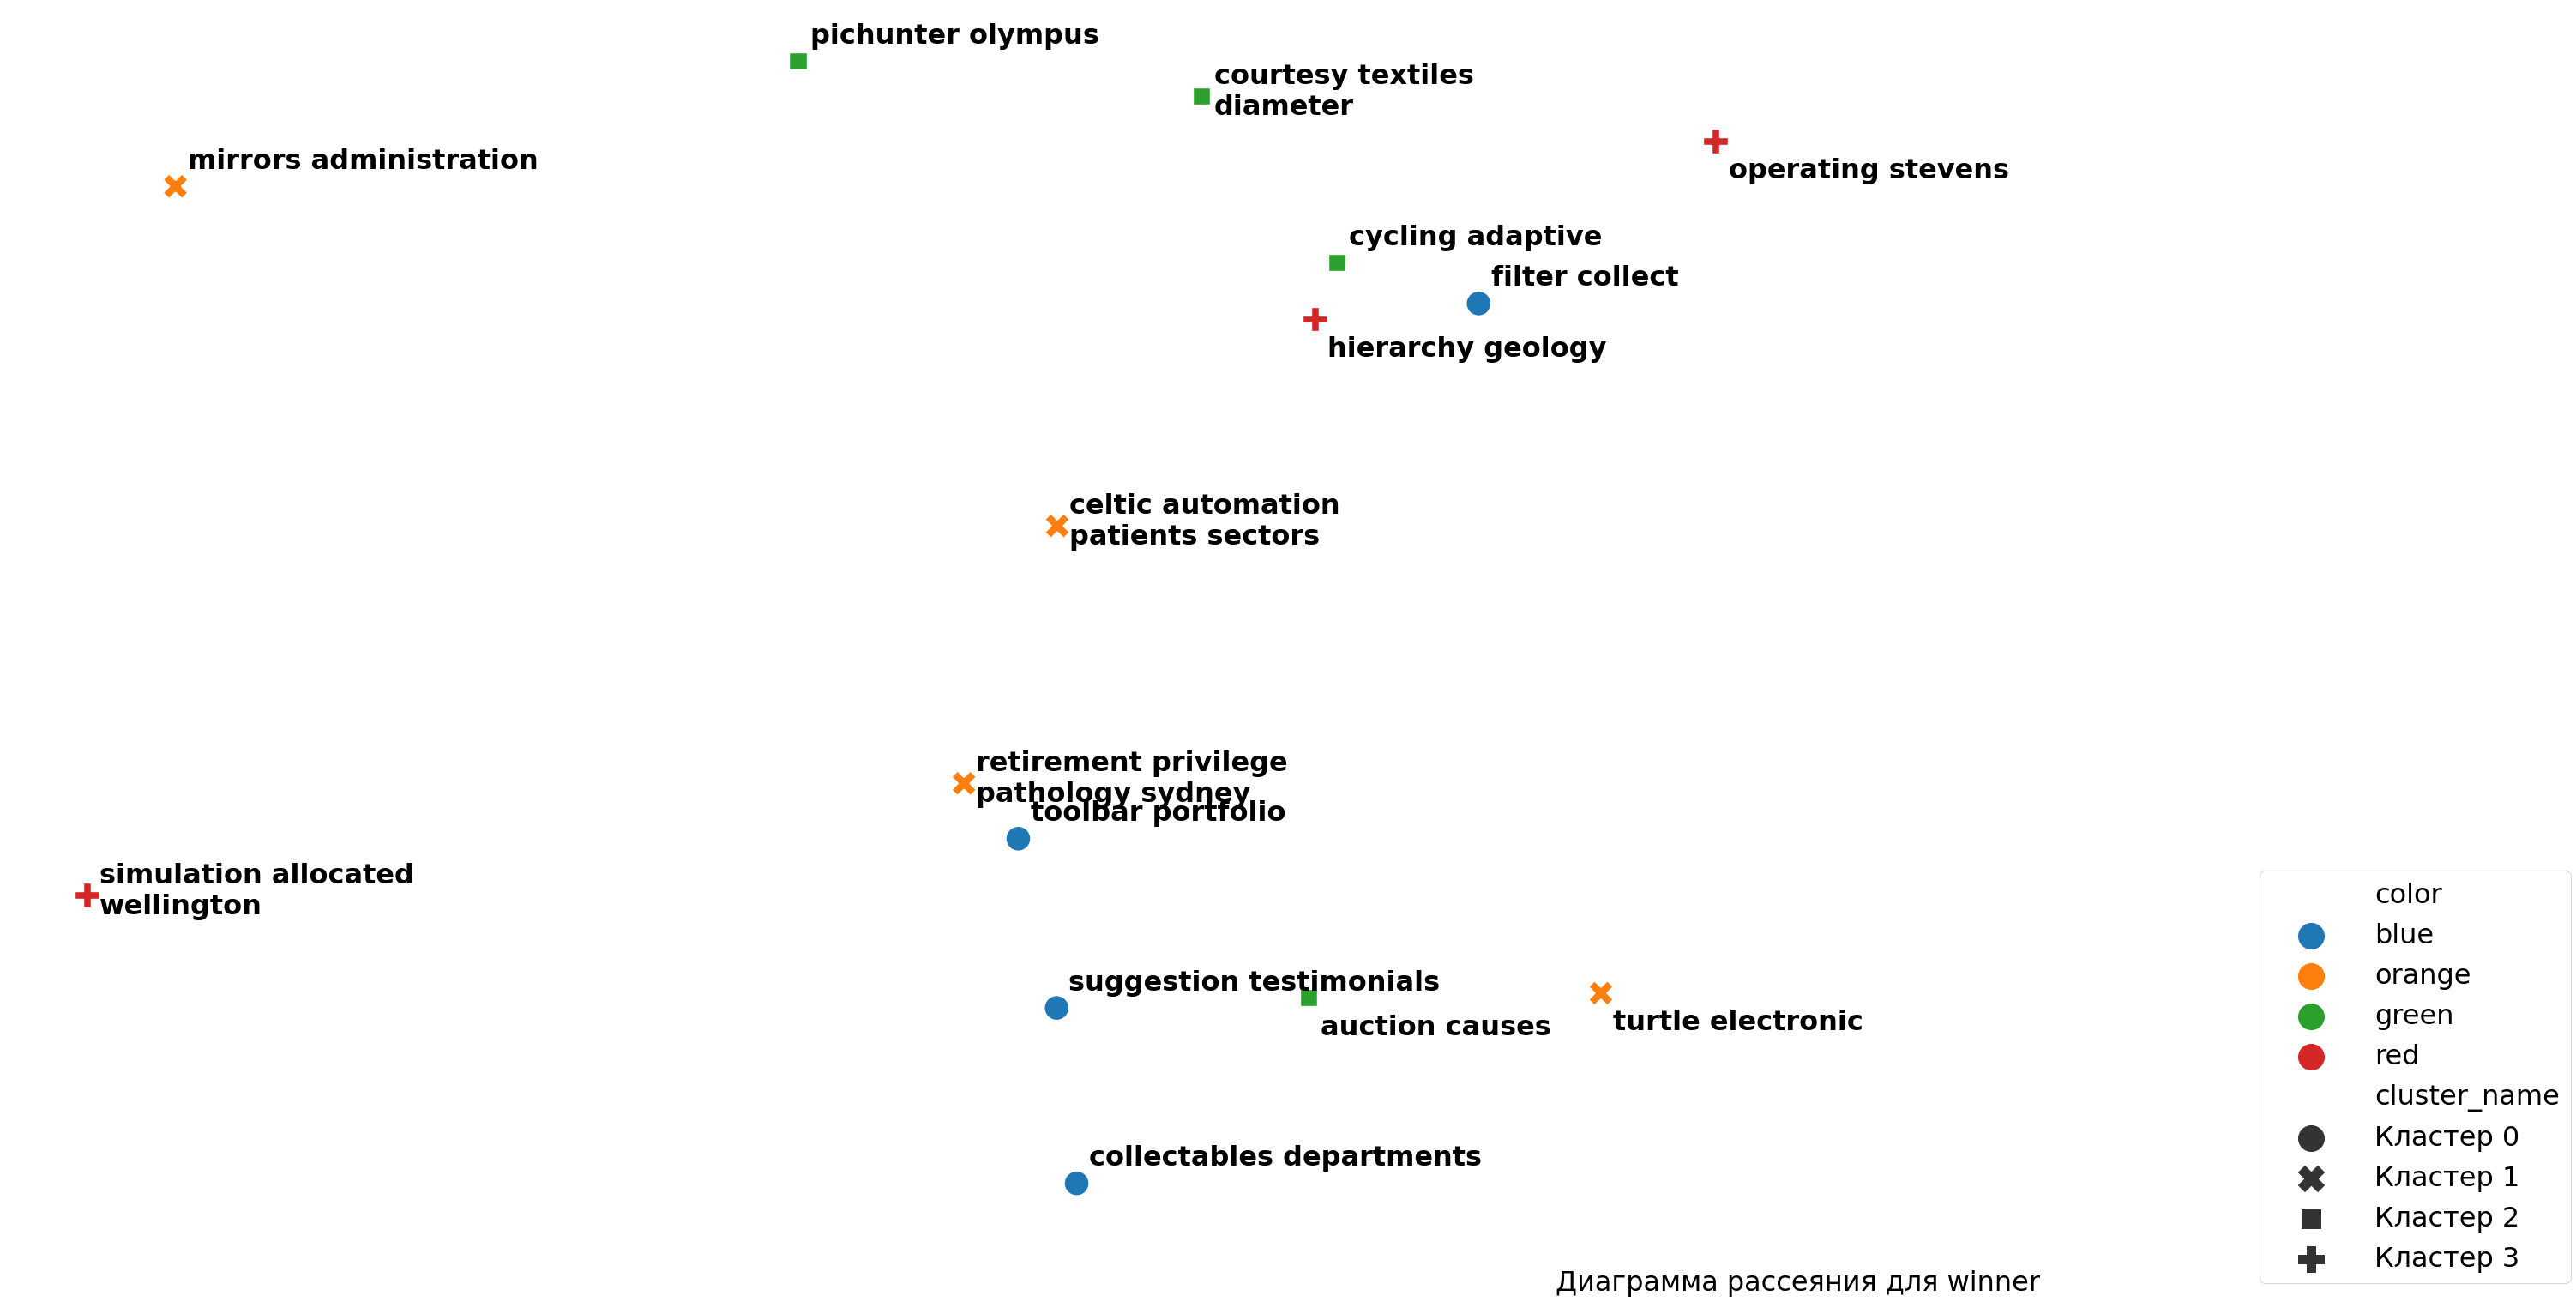

In [38]:
plot_graph('winner', t_x=1, t_y=-0.045, k1=-1, k2=+0.2, k3=-2.5)

## worlds

In [39]:
cur_df = res.loc[res['area'] == 'worlds']
cur_df.reset_index(inplace=True, drop=True)
# cur_df

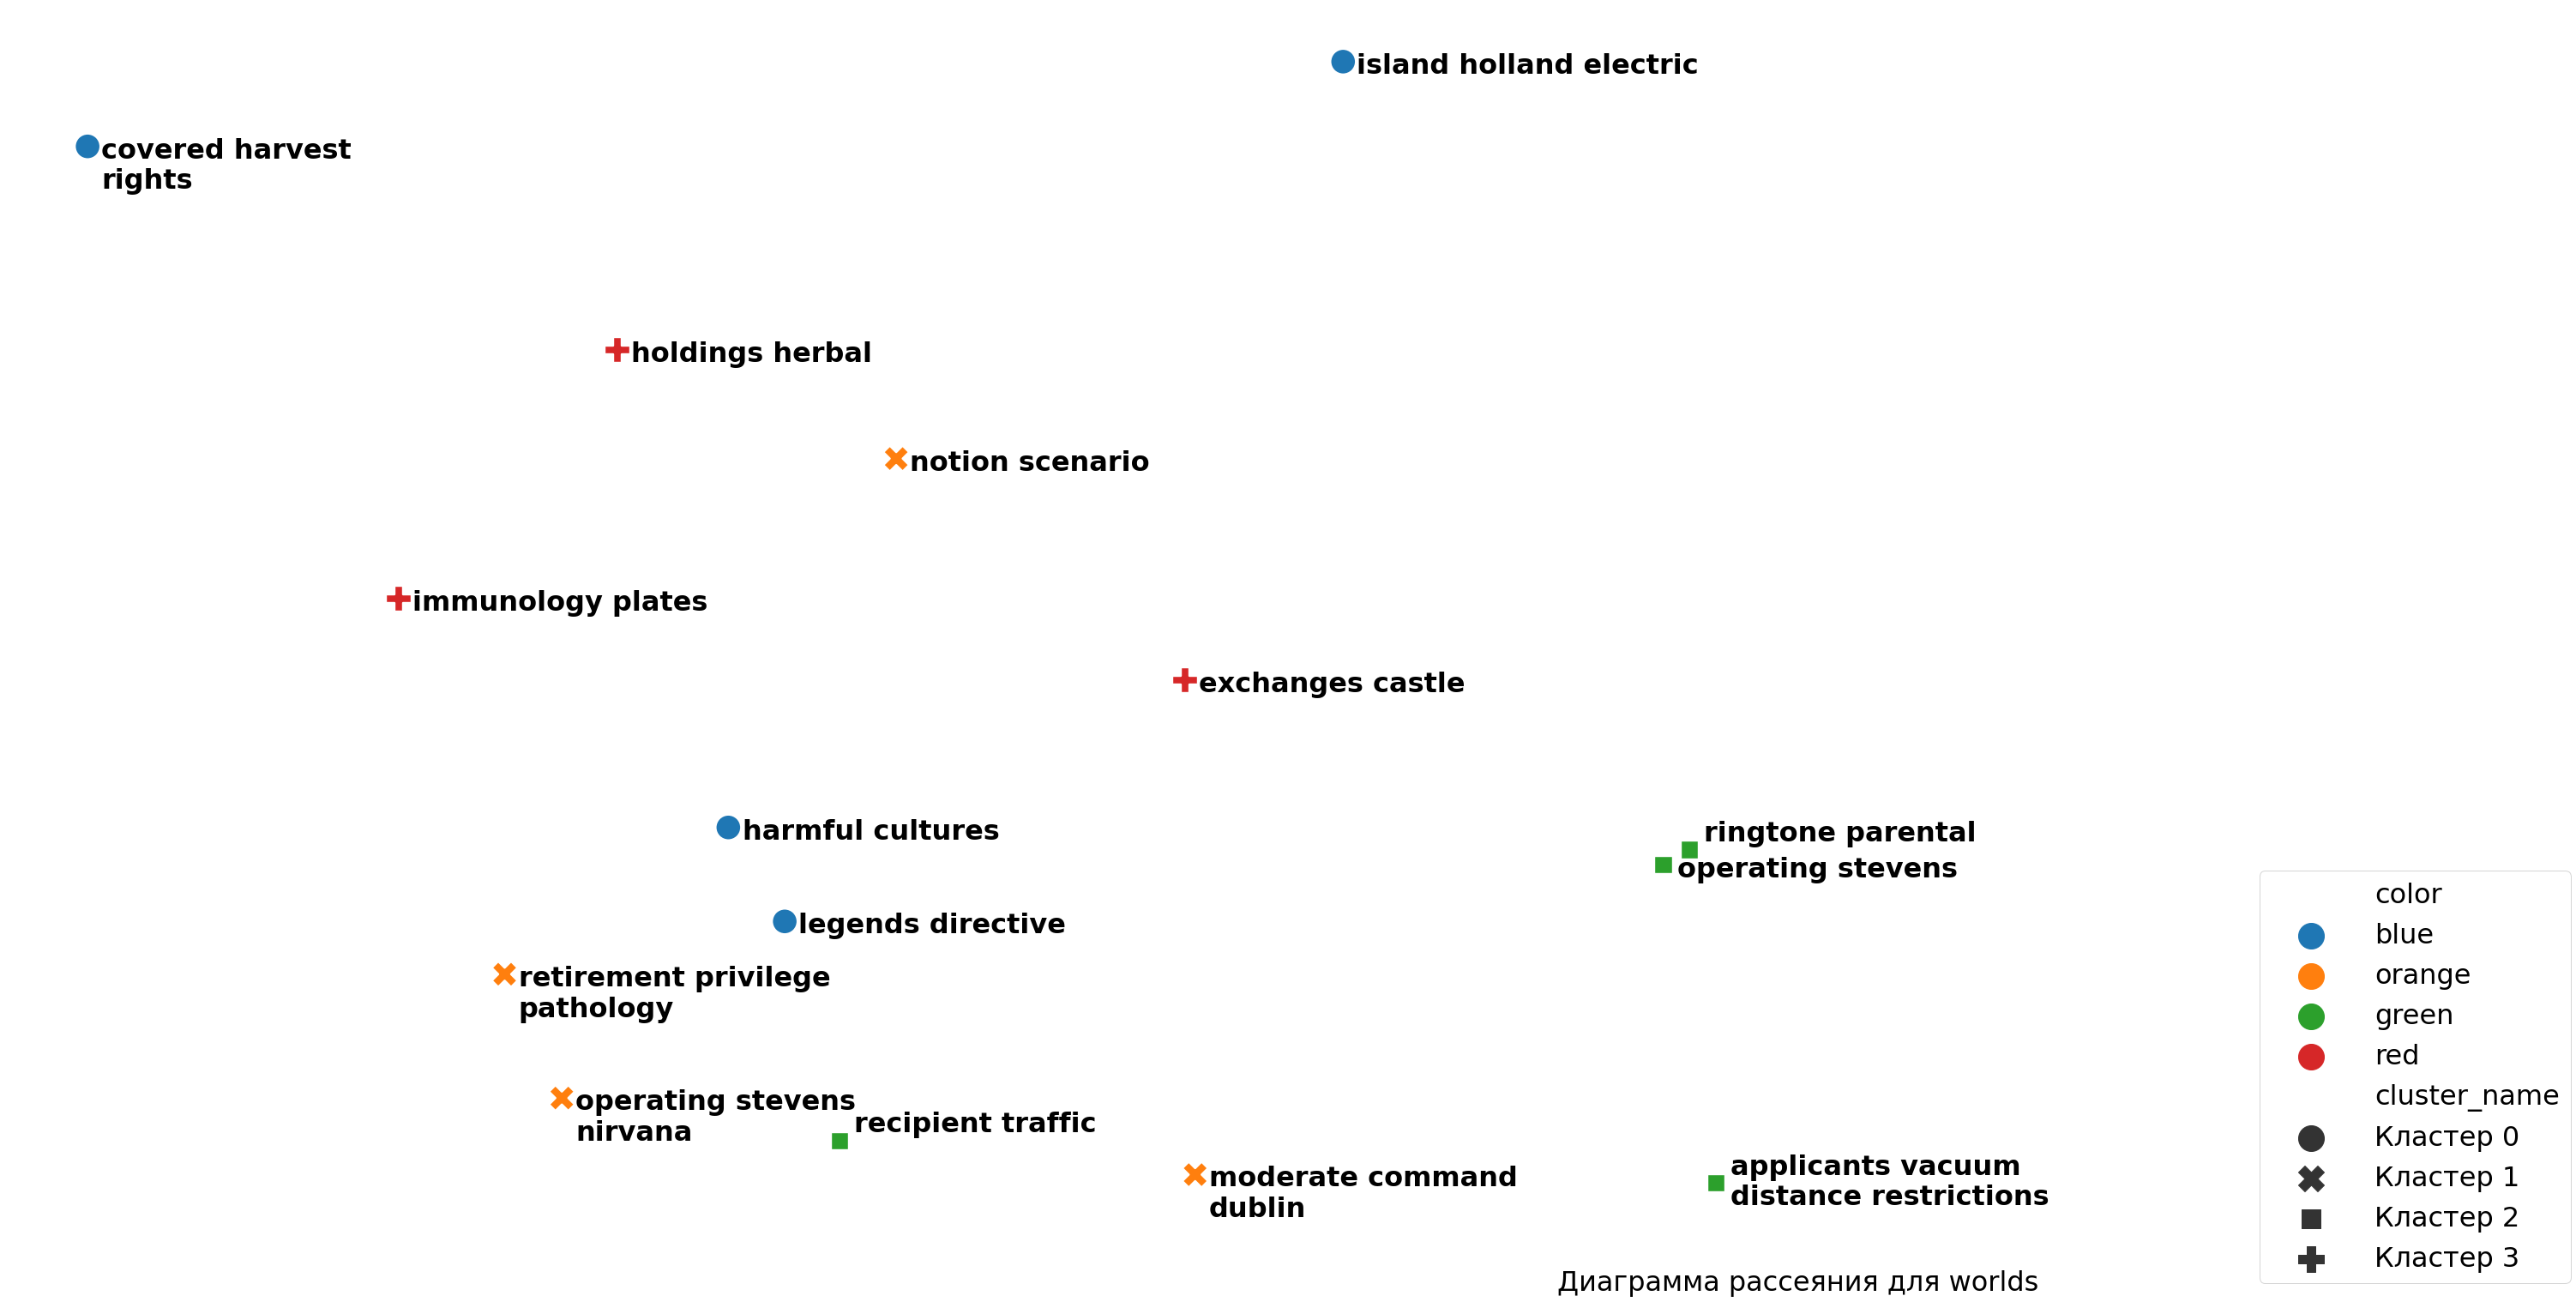

In [40]:
plot_graph('worlds', t_x=1, t_y=-0.045, k1=0.3, k2=-0.15, k3=-2.5, k4=1, k5=2)

## End